In [2]:
import dandelion as ddl
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import os
import milopy.core as milo

In [ ]:

# https://sc-dandelion.readthedocs.io/en/latest/notebooks/Q5-psuedobulk.html

## Fetal BCR Data

In [85]:
adata = sc.read(os.getcwd() + "/data/Fetal/FICA_Bcell_BCR_Suo2022.h5ad") # BCR file to be read in
# adata = ddl.tl.setup_vdj_pseudobulk(adata)

In [73]:
adata

AnnData object with n_obs × n_vars = 29818 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'v_call_genotyped_VJ', 'd_call_VDJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ', 'duplicate_count_VJ', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_1', 'duplicate_count_VDJ_2', 'duplicate_count_VDJ_3', 'junction_aa_VDJ', 'junction_aa_VJ', 'locus_status', 'locus_status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'consta

In [74]:
adata.X

<29818x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 64682108 stored elements in Compressed Sparse Row format>

In [75]:
adata.var

GeneID    GeneName  highly_variable         means  \
TSPAN6      ENSG00000000003      TSPAN6            False  4.035925e-01   
TNMD        ENSG00000000005        TNMD             True  1.584207e-03   
DPM1        ENSG00000000419        DPM1            False  1.788998e+00   
SCYL3       ENSG00000000457       SCYL3            False  6.861534e-01   
C1orf112    ENSG00000000460    C1orf112            False  7.675063e-01   
...                     ...         ...              ...           ...   
AL356417.3  ENSG00000285492  AL356417.3             True  4.720252e-02   
AC010616.2  ENSG00000285505  AC010616.2            False  1.601228e-04   
AL034430.1  ENSG00000285508  AL034430.1            False  1.000000e-12   
AP000646.1  ENSG00000285509  AP000646.1            False  2.194406e-03   
AP006216.3  ENSG00000285513  AP006216.3            False  2.159360e-03   

            dispersions  dispersions_norm  scvi_model_var  
TSPAN6         3.192145         -0.068286           False  
TNMD           3.603207          1.060200            True  
DPM1           3.008108         -0.570585           False  
SCYL3          3.088048         -0.256646           False  
C1orf112       2.918053         -0.564248           False  
...                 ...               ...             ...  
AL356417.3     3.378242          0.621048            True  
AC010616.2     3.025356         -0.067820           False  
AL034430.1          NaN          0.000000           False  
AP000646.1     2.850603         -0.408955           False  
AP006216.3     3.300553          0.469390            True  

[33538 rows x 7 columns]

In [76]:
GEXdata.obs

n_counts  n_genes  \
index                                                        
Human_colon_16S8159187-AGCTCTCAGTGTACTC   12236.0     2627   
Human_colon_16S8159187-TTAGGCATCAAGAAGT   11355.0     2709   
Human_colon_16S8159187-AGAATAGAGTGTGAAT    8394.0     2161   
Human_colon_16S8159187-GGATTACAGAGAGCTC    7740.0     2316   
Human_colon_16S8159187-TTCTACACATACAGCT    6661.0     1625   
...                                           ...      ...   
FCAImmP7803020-CGATCGGGTAGAGCTG            2074.0      693   
FCAImmP7803020-AGACGTTAGAGGTTAT            2064.0      890   
FCAImmP7803020-GTGTTAGCACCGGAAA            2048.0      737   
FCAImmP7803020-ACACCGGGTGTCTGAT            2040.0      734   
FCAImmP7803020-CGATGTAGTCTGCGGT            2018.0      826   

                                                           file      mito  \
index                                                                       
Human_colon_16S8159187-AGCTCTCAGTGTACTC  Human_colon_16S8159187  0.032772   
Human_colon_16S8159187-TTAGGCATCAAGAAGT  Human_colon_16S8159187  0.035315   
Human_colon_16S8159187-AGAATAGAGTGTGAAT  Human_colon_16S8159187  0.024184   
Human_colon_16S8159187-GGATTACAGAGAGCTC  Human_colon_16S8159187  0.024419   
Human_colon_16S8159187-TTCTACACATACAGCT  Human_colon_16S8159187  0.014112   
...                                                         ...       ...   
FCAImmP7803020-CGATCGGGTAGAGCTG                  FCAImmP7803020  0.030858   
FCAImmP7803020-AGACGTTAGAGGTTAT                  FCAImmP7803020  0.021318   
FCAImmP7803020-GTGTTAGCACCGGAAA                  FCAImmP7803020  0.016113   
FCAImmP7803020-ACACCGGGTGTCTGAT                  FCAImmP7803020  0.059804   
FCAImmP7803020-CGATGTAGTCTGCGGT                  FCAImmP7803020  0.038652   

                                         doublet_scores predicted_doublets  \
index                                                                        
Human_colon_16S8159187-AGCTCTCAGTGTACTC        0.293388               True   
Human_colon_16S8159187-TTAGGCATCAAGAAGT        0.136000              False   
Human_colon_16S8159187-AGAATAGAGTGTGAAT        0.195231              False   
Human_colon_16S8159187-GGATTACAGAGAGCTC        0.112676              False   
Human_colon_16S8159187-TTCTACACATACAGCT        0.109792              False   
...                                                 ...                ...   
FCAImmP7803020-CGATCGGGTAGAGCTG                0.030568              False   
FCAImmP7803020-AGACGTTAGAGGTTAT                0.023443              False   
FCAImmP7803020-GTGTTAGCACCGGAAA                0.028409              False   
FCAImmP7803020-ACACCGGGTGTCTGAT                0.031688              False   
FCAImmP7803020-CGATGTAGTCTGCGGT                0.008183              False   

                                        old_annotation_uniform organ  \
index                                                                  
Human_colon_16S8159187-AGCTCTCAGTGTACTC                    nan    GU   
Human_colon_16S8159187-TTAGGCATCAAGAAGT                    nan    GU   
Human_colon_16S8159187-AGAATAGAGTGTGAAT                    nan    GU   
Human_colon_16S8159187-GGATTACAGAGAGCTC                    nan    GU   
Human_colon_16S8159187-TTCTACACATACAGCT                    nan    GU   
...                                                        ...   ...   
FCAImmP7803020-CGATCGGGTAGAGCTG                            nan    SP   
FCAImmP7803020-AGACGTTAGAGGTTAT                         B CELL    SP   
FCAImmP7803020-GTGTTAGCACCGGAAA                            nan    SP   
FCAImmP7803020-ACACCGGGTGTCTGAT                            nan    SP   
FCAImmP7803020-CGATGTAGTCTGCGGT                         B CELL    SP   

                                             Sort_id  age  ... mu_freq  \
index                                                      ...           
Human_colon_16S8159187-AGCTCTCAGTGTACTC  CD45P_CD45N   15  ...     0.0   
Human_colon_16S8159187-TTAGGCATCAAGAAGT  CD45P_CD45N   15 

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


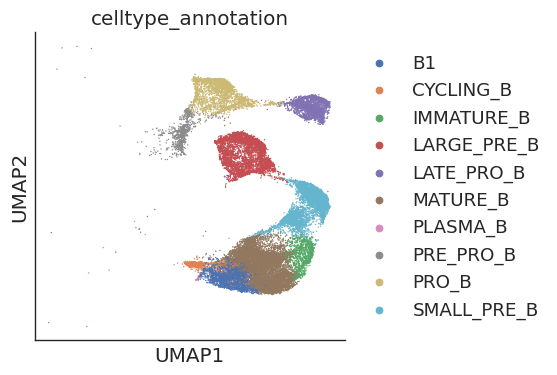

In [77]:
sc.pl.umap(adata, color = "celltype_annotation")

In [78]:
#### later after sc.pp.highly_variable_features

import re

# this step is to exclude any V/D/J genes from the highly variable features list
# task 3 what is highly variable featuers 

# ig genes are encoded like so:

# heavy chain V: IGHV1-1
# heavy chain D: IGHD1-2
# heavy chain J: IGHJ1-2
# light chain V: either IGLV1 or IGKV1
# light chain J: either IGLJ1 or IGKJ1
# constant gene in heavy chain: IGHM ,IGHD, IGHA1, IGHA2, IGHG1....
# constant gene in light chain: IGKC, IGLC1, IGLC2 ....

for i in adata.var.index:
    if re.search('IG[HKL][VDJ]', i): # normally the regex pattern is "IG[HKL][VDJC]|TR[AB][VDJ]"
        adata.var.at[i, "highly_variable"] = False

In [ ]:
# run scanpy

In [79]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.4 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.14.0 igraph==0.10.6 louvain==0.8.1 pynndescent==0.5.10


In [80]:
# unnecessary?

# data = sc.read_10x_mtx(
#     './data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
#     var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
#     cache=True)                              # write a cache file for faster subsequent reading

In [86]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

normalizing counts per cell
    finished (0:00:00)


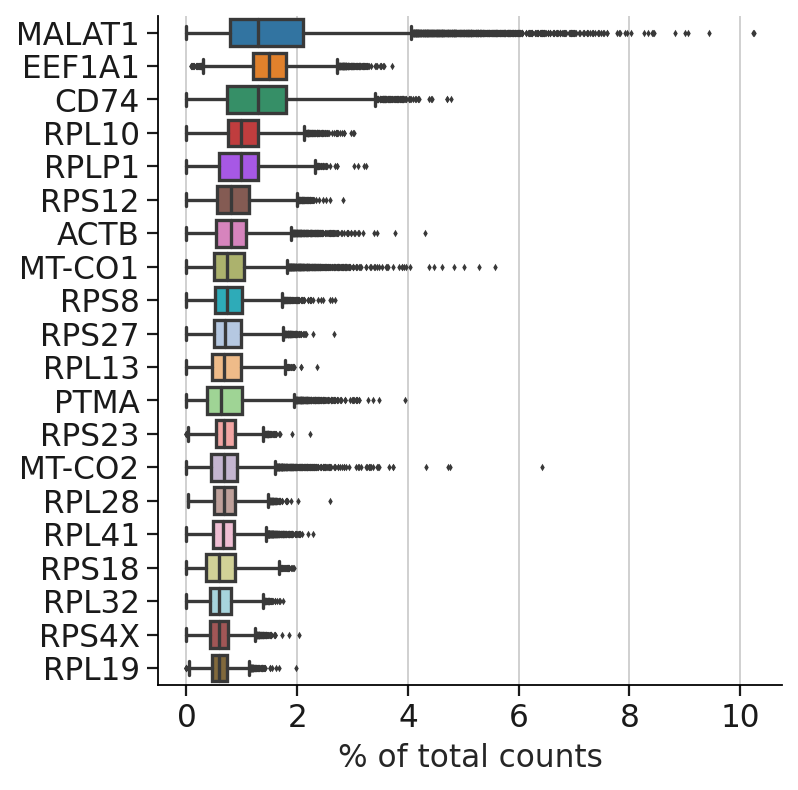

In [87]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [ ]:
#sc.pp.filter_cells(adata, min_genes=200)
#sc.pp.filter_genes(adata, min_cells=3)



In [88]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

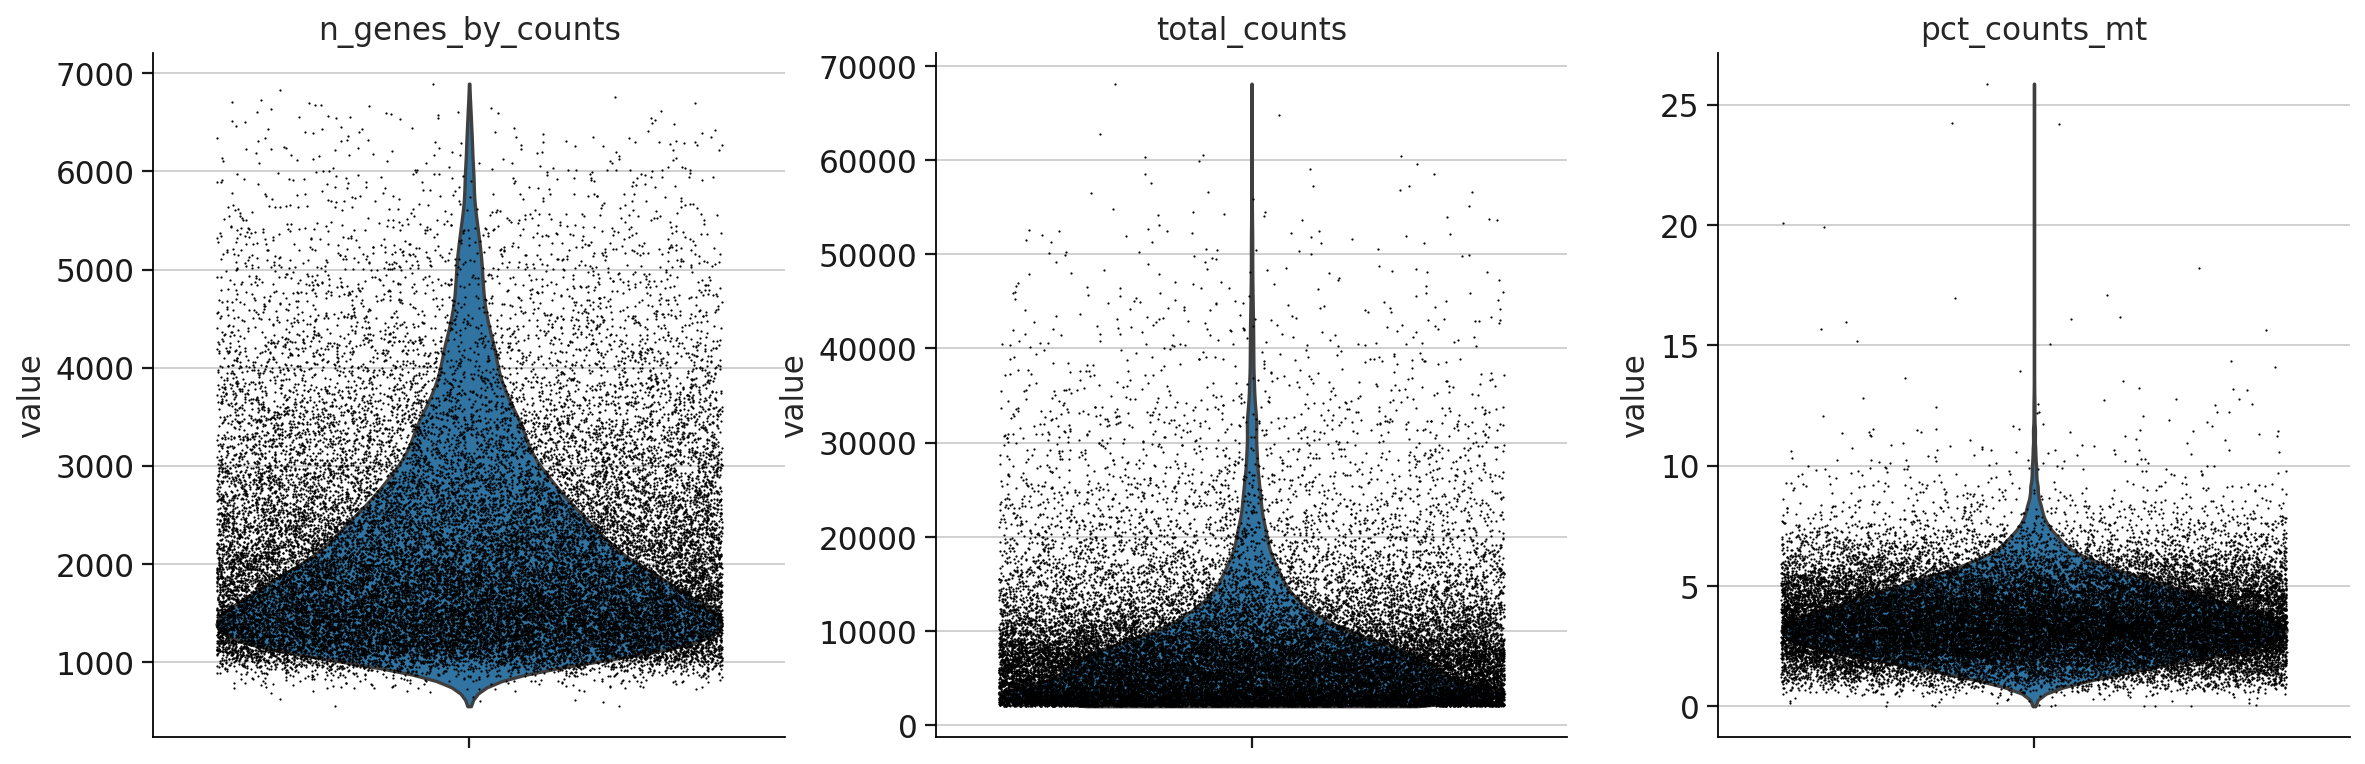

In [89]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [90]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]



In [91]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell


C:\Users\chris\anaconda\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.


    finished (0:00:00)


In [92]:
sc.pp.log1p(adata)



In [93]:
# another step needs to be added by Kelvin

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


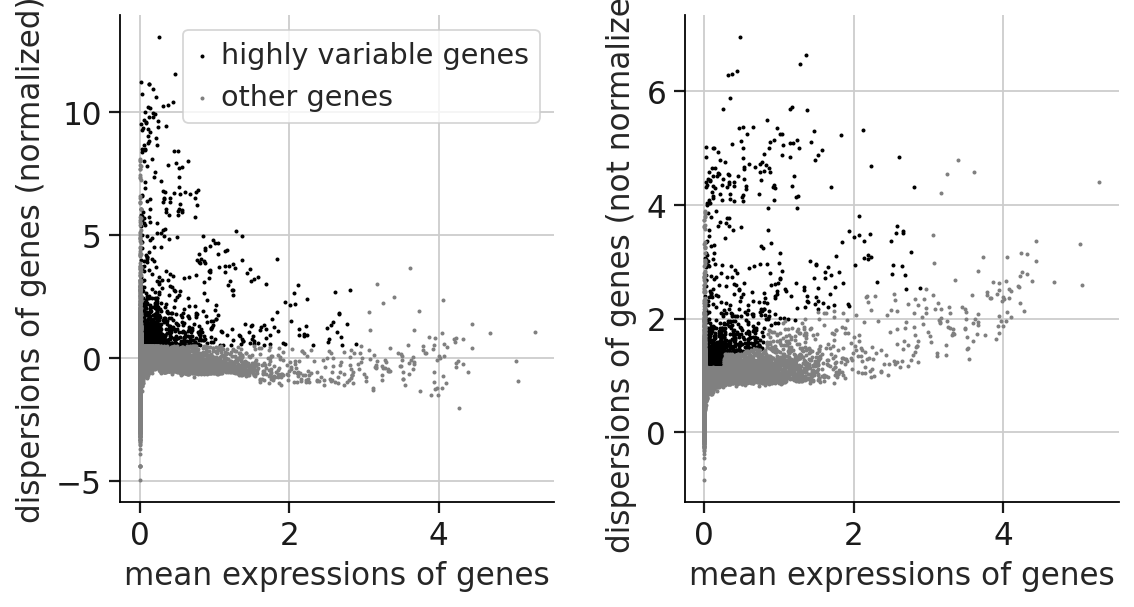

In [94]:
sc.pl.highly_variable_genes(adata)

In [95]:
adata.raw = adata

In [96]:
adata = adata[:, adata.var.highly_variable]

In [97]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:26)


In [47]:
sc.pp.scale(adata, max_value=10)

In [48]:
# PCA

sc.tl.pca(adata, svd_solver='arpack')



computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


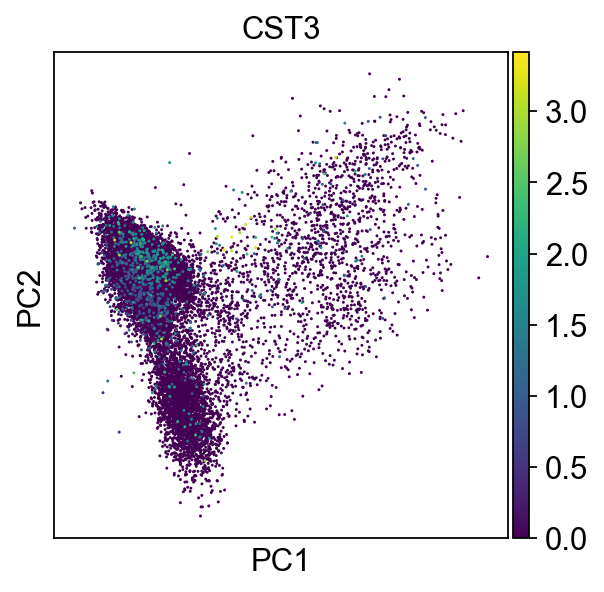

In [49]:
sc.pl.pca(adata, color='CST3')



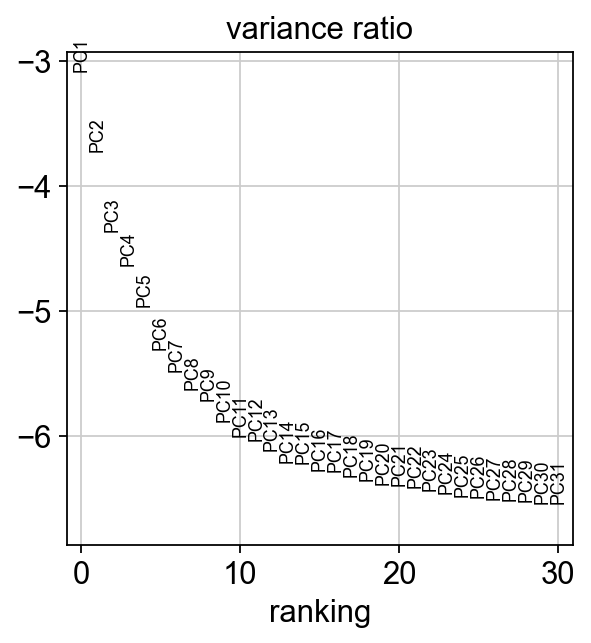

In [50]:
sc.pl.pca_variance_ratio(adata, log=True)

In [51]:
# compute the neighborhood graph of cells
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)


In [52]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


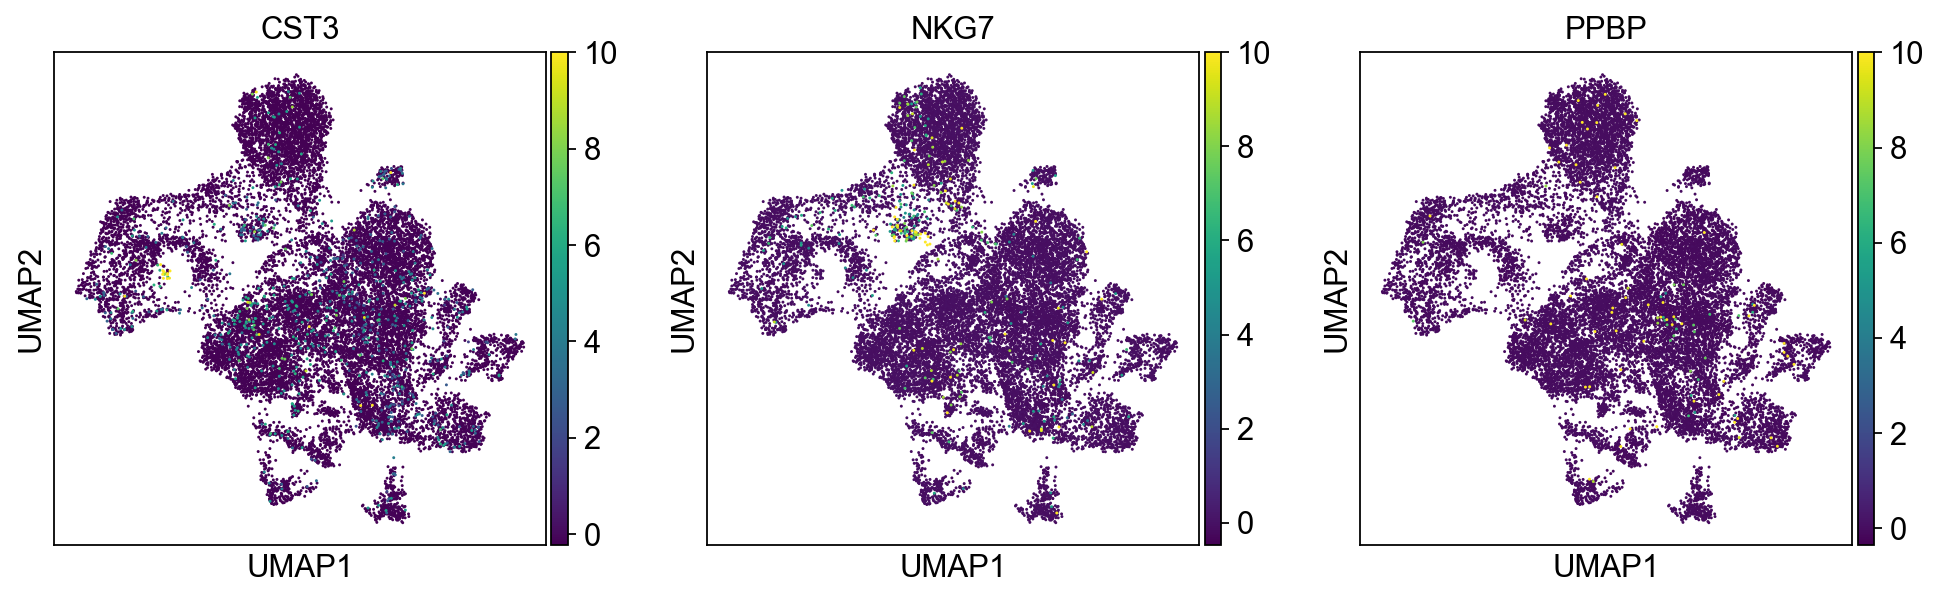

In [53]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


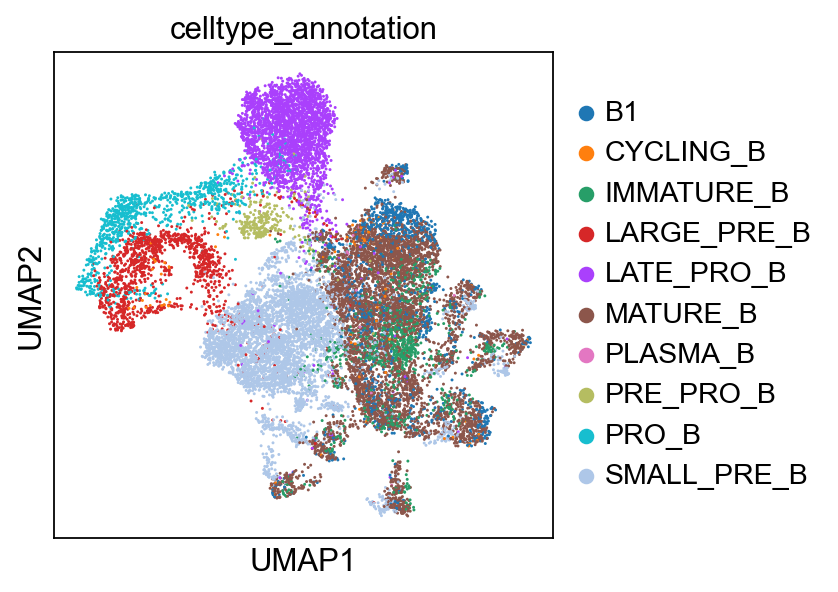

In [54]:
sc.pl.umap(adata, color = "celltype_annotation")

In [39]:
# import miolpy and palantir
import milopy.core as milo
import palantir

#required because of Palantir
%matplotlib inline

sc.settings.set_figure_params(dpi=80)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [56]:
adata.obs.head()

n_counts  n_genes  \
index                                                        
Human_colon_16S8159187-AGAATAGAGTGTGAAT    8394.0     2161   
Human_colon_16S8159187-GGATTACAGAGAGCTC    7740.0     2316   
Human_colon_16S8159187-TTCTACACATACAGCT    6661.0     1625   
Human_colon_16S8159187-TACACGAAGAGCCCAA    4683.0     1335   
Human_colon_16S8159187-GTACGTATCTGTCCGT    4124.0     1613   

                                                           file      mito  \
index                                                                       
Human_colon_16S8159187-AGAATAGAGTGTGAAT  Human_colon_16S8159187  0.024184   
Human_colon_16S8159187-GGATTACAGAGAGCTC  Human_colon_16S8159187  0.024419   
Human_colon_16S8159187-TTCTACACATACAGCT  Human_colon_16S8159187  0.014112   
Human_colon_16S8159187-TACACGAAGAGCCCAA  Human_colon_16S8159187  0.031390   
Human_colon_16S8159187-GTACGTATCTGTCCGT  Human_colon_16S8159187  0.015761   

                                         doublet_scores predicted_doublets  \
index                                                                        
Human_colon_16S8159187-AGAATAGAGTGTGAAT        0.195231              False   
Human_colon_16S8159187-GGATTACAGAGAGCTC        0.112676              False   
Human_colon_16S8159187-TTCTACACATACAGCT        0.109792              False   
Human_colon_16S8159187-TACACGAAGAGCCCAA        0.109792              False   
Human_colon_16S8159187-GTACGTATCTGTCCGT        0.077662              False   

                                        old_annotation_uniform organ  \
index                                                                  
Human_colon_16S8159187-AGAATAGAGTGTGAAT                    nan    GU   
Human_colon_16S8159187-GGATTACAGAGAGCTC                    nan    GU   
Human_colon_16S8159187-TTCTACACATACAGCT                    nan    GU   
Human_colon_16S8159187-TACACGAAGAGCCCAA                    nan    GU   
Human_colon_16S8159187-GTACGTATCTGTCCGT                    nan    GU   

                                             Sort_id  age  ...  \
index                                                      ...   
Human_colon_16S8159187-AGAATAGAGTGTGAAT  CD45P_CD45N   15  ...   
Human_colon_16S8159187-GGATTACAGAGAGCTC  CD45P_CD45N   15  ...   
Human_colon_16S8159187-TTCTACACATACAGCT  CD45P_CD45N   15  ...   
Human_colon_16S8159187-TACACGAAGAGCCCAA  CD45P_CD45N   15  ...   
Human_colon_16S8159187-GTACGTATCTGTCCGT  CD45P_CD45N   15  ...   

                                        junction_aa_length_VJ np1_length_VDJ  \
index                                                                          
Human_colon_16S8159187-AGAATAGAGTGTGAAT                  12.0            6.0   
Human_colon_16S8159187-GGATTACAGAGAGCTC                   NaN            NaN   
Human_colon_16S8159187-TTCTACACATACAGCT                   NaN            NaN   
Human_colon_16S8159187-TACACGAAGAGCCCAA                  12.0            5.0   
Human_colon_16S8159187-GTACGTATCTGTCCGT                   NaN            NaN   

                                        np1_length_VJ np2_length_VDJ  \
index                                                                  
Human_colon_16S8159187-AGAATAGAGTGTGAAT           0.0            8.0   
Human_colon_16S8159187-GGATTACAGAGAGCTC           NaN            NaN   
Human_colon_16S8159187-TTCTACACATACAGCT           NaN            NaN   
Human_colon_16S8159187-TACACGAAGAGCCCAA           0.0            5.0   
Human_colon_16S8159187-GTACGTATCTGTCCGT           NaN            NaN   

                                        clone_id_size  clone_id_size_max_3  \
index                                                                        
Human_colon_16S8159187-AGAATAGAGTGTGAAT           1.0                  1.0   
Human_colon_16S8159187-GGATTACAGAGAGCTC           NaN                  nan   
Human_colon_16S8159187-TTCTACACATACAGCT           NaN                  nan   
Human_colon_16S8159187-TACACGAAGAGCCCAA           1.0                  1.0   
Human_colon_16S81

In [57]:
adata = ddl.tl.setup_vdj_pseudobulk(adata, mode=None) # subset the object to cells with a pair of chains

KeyError: 'chain_status'

In [40]:
sc.pp.neighbors(adata, use_rep="X_scvi", n_neighbors=50)
milo.make_nhoods(adata)
sc.tl.umap(adata)

NameError: name 'adata' is not defined

In [ ]:
adata

In [ ]:
pb_adata = ddl.tl.vdj_pseudobulk(
    adata, pbs=adata.obsm["nhoods"], obs_to_take="celltype_annotation"
)

In [ ]:
pb_data

## Fetal Bcell Gene Expression Data

In [3]:
import dandelion as ddl
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import os
import milopy.core as milo
import palantir

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [4]:
# read Gene Expression Data

# GEXdata = sc.read(os.getcwd() + "/write/BCR_contigs.h5ad")
GEXdata = sc.read(os.getcwd() + "/data/Fetal/FICA_Bcell_GEX_Suo2022.h5ad") 
GEXdata

AnnData object with n_obs × n_vars = 29818 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'v_call_genotyped_VJ', 'd_call_VDJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ', 'duplicate_count_VJ', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_1', 'duplicate_count_VDJ_2', 'duplicate_count_VDJ_3', 'junction_aa_VDJ', 'junction_aa_VJ', 'locus_status', 'locus_status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'consta

In [5]:
GEXdata.obs

n_counts  n_genes  \
index                                                        
Human_colon_16S8159187-AGCTCTCAGTGTACTC   12236.0     2627   
Human_colon_16S8159187-TTAGGCATCAAGAAGT   11355.0     2709   
Human_colon_16S8159187-AGAATAGAGTGTGAAT    8394.0     2161   
Human_colon_16S8159187-GGATTACAGAGAGCTC    7740.0     2316   
Human_colon_16S8159187-TTCTACACATACAGCT    6661.0     1625   
...                                           ...      ...   
FCAImmP7803020-CGATCGGGTAGAGCTG            2074.0      693   
FCAImmP7803020-AGACGTTAGAGGTTAT            2064.0      890   
FCAImmP7803020-GTGTTAGCACCGGAAA            2048.0      737   
FCAImmP7803020-ACACCGGGTGTCTGAT            2040.0      734   
FCAImmP7803020-CGATGTAGTCTGCGGT            2018.0      826   

                                                           file      mito  \
index                                                                       
Human_colon_16S8159187-AGCTCTCAGTGTACTC  Human_colon_16S8159187  0.032772   
Human_colon_16S8159187-TTAGGCATCAAGAAGT  Human_colon_16S8159187  0.035315   
Human_colon_16S8159187-AGAATAGAGTGTGAAT  Human_colon_16S8159187  0.024184   
Human_colon_16S8159187-GGATTACAGAGAGCTC  Human_colon_16S8159187  0.024419   
Human_colon_16S8159187-TTCTACACATACAGCT  Human_colon_16S8159187  0.014112   
...                                                         ...       ...   
FCAImmP7803020-CGATCGGGTAGAGCTG                  FCAImmP7803020  0.030858   
FCAImmP7803020-AGACGTTAGAGGTTAT                  FCAImmP7803020  0.021318   
FCAImmP7803020-GTGTTAGCACCGGAAA                  FCAImmP7803020  0.016113   
FCAImmP7803020-ACACCGGGTGTCTGAT                  FCAImmP7803020  0.059804   
FCAImmP7803020-CGATGTAGTCTGCGGT                  FCAImmP7803020  0.038652   

                                         doublet_scores predicted_doublets  \
index                                                                        
Human_colon_16S8159187-AGCTCTCAGTGTACTC        0.293388               True   
Human_colon_16S8159187-TTAGGCATCAAGAAGT        0.136000              False   
Human_colon_16S8159187-AGAATAGAGTGTGAAT        0.195231              False   
Human_colon_16S8159187-GGATTACAGAGAGCTC        0.112676              False   
Human_colon_16S8159187-TTCTACACATACAGCT        0.109792              False   
...                                                 ...                ...   
FCAImmP7803020-CGATCGGGTAGAGCTG                0.030568              False   
FCAImmP7803020-AGACGTTAGAGGTTAT                0.023443              False   
FCAImmP7803020-GTGTTAGCACCGGAAA                0.028409              False   
FCAImmP7803020-ACACCGGGTGTCTGAT                0.031688              False   
FCAImmP7803020-CGATGTAGTCTGCGGT                0.008183              False   

                                        old_annotation_uniform organ  \
index                                                                  
Human_colon_16S8159187-AGCTCTCAGTGTACTC                    nan    GU   
Human_colon_16S8159187-TTAGGCATCAAGAAGT                    nan    GU   
Human_colon_16S8159187-AGAATAGAGTGTGAAT                    nan    GU   
Human_colon_16S8159187-GGATTACAGAGAGCTC                    nan    GU   
Human_colon_16S8159187-TTCTACACATACAGCT                    nan    GU   
...                                                        ...   ...   
FCAImmP7803020-CGATCGGGTAGAGCTG                            nan    SP   
FCAImmP7803020-AGACGTTAGAGGTTAT                         B CELL    SP   
FCAImmP7803020-GTGTTAGCACCGGAAA                            nan    SP   
FCAImmP7803020-ACACCGGGTGTCTGAT                            nan    SP   
FCAImmP7803020-CGATGTAGTCTGCGGT                         B CELL    SP   

                                             Sort_id  age  ... mu_freq  \
index                                                      ...           
Human_colon_16S8159187-AGCTCTCAGTGTACTC  CD45P_CD45N   15  ...     0.0   
Human_colon_16S8159187-TTAGGCATCAAGAAGT  CD45P_CD45N   15 

In [6]:
GEXdata.obs["anno_lvl_2_final_clean"].unique()

['MATURE_B', 'B1', 'PRO_B', 'LARGE_PRE_B', 'SMALL_PRE_B', 'LATE_PRO_B', 'PRE_PRO_B', 'CYCLING_B', 'IMMATURE_B', 'PLASMA_B']
Categories (10, object): ['B1', 'CYCLING_B', 'IMMATURE_B', 'LARGE_PRE_B', ..., 'PLASMA_B', 'PRE_PRO_B', 'PRO_B', 'SMALL_PRE_B']

In [7]:
GEXdata.var_names_make_unique()

In [ ]:
# https://anndata.readthedocs.io/en/latest/

In [8]:
GEXdata.var


GeneID    GeneName  highly_variable         means  \
TSPAN6      ENSG00000000003      TSPAN6            False  4.035925e-01   
TNMD        ENSG00000000005        TNMD             True  1.584207e-03   
DPM1        ENSG00000000419        DPM1            False  1.788998e+00   
SCYL3       ENSG00000000457       SCYL3            False  6.861534e-01   
C1orf112    ENSG00000000460    C1orf112            False  7.675063e-01   
...                     ...         ...              ...           ...   
AL356417.3  ENSG00000285492  AL356417.3             True  4.720252e-02   
AC010616.2  ENSG00000285505  AC010616.2            False  1.601228e-04   
AL034430.1  ENSG00000285508  AL034430.1            False  1.000000e-12   
AP000646.1  ENSG00000285509  AP000646.1            False  2.194406e-03   
AP006216.3  ENSG00000285513  AP006216.3            False  2.159360e-03   

            dispersions  dispersions_norm  scvi_model_var  
TSPAN6         3.192145         -0.068286           False  
TNMD           3.603207          1.060200            True  
DPM1           3.008108         -0.570585           False  
SCYL3          3.088048         -0.256646           False  
C1orf112       2.918053         -0.564248           False  
...                 ...               ...             ...  
AL356417.3     3.378242          0.621048            True  
AC010616.2     3.025356         -0.067820           False  
AL034430.1          NaN          0.000000           False  
AP000646.1     2.850603         -0.408955           False  
AP006216.3     3.300553          0.469390            True  

[33538 rows x 7 columns]

In [9]:
GEXdata.X

<29818x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 64682108 stored elements in Compressed Sparse Row format>

In [10]:
GEXdata.obs.head()

n_counts  n_genes  \
index                                                        
Human_colon_16S8159187-AGCTCTCAGTGTACTC   12236.0     2627   
Human_colon_16S8159187-TTAGGCATCAAGAAGT   11355.0     2709   
Human_colon_16S8159187-AGAATAGAGTGTGAAT    8394.0     2161   
Human_colon_16S8159187-GGATTACAGAGAGCTC    7740.0     2316   
Human_colon_16S8159187-TTCTACACATACAGCT    6661.0     1625   

                                                           file      mito  \
index                                                                       
Human_colon_16S8159187-AGCTCTCAGTGTACTC  Human_colon_16S8159187  0.032772   
Human_colon_16S8159187-TTAGGCATCAAGAAGT  Human_colon_16S8159187  0.035315   
Human_colon_16S8159187-AGAATAGAGTGTGAAT  Human_colon_16S8159187  0.024184   
Human_colon_16S8159187-GGATTACAGAGAGCTC  Human_colon_16S8159187  0.024419   
Human_colon_16S8159187-TTCTACACATACAGCT  Human_colon_16S8159187  0.014112   

                                         doublet_scores predicted_doublets  \
index                                                                        
Human_colon_16S8159187-AGCTCTCAGTGTACTC        0.293388               True   
Human_colon_16S8159187-TTAGGCATCAAGAAGT        0.136000              False   
Human_colon_16S8159187-AGAATAGAGTGTGAAT        0.195231              False   
Human_colon_16S8159187-GGATTACAGAGAGCTC        0.112676              False   
Human_colon_16S8159187-TTCTACACATACAGCT        0.109792              False   

                                        old_annotation_uniform organ  \
index                                                                  
Human_colon_16S8159187-AGCTCTCAGTGTACTC                    nan    GU   
Human_colon_16S8159187-TTAGGCATCAAGAAGT                    nan    GU   
Human_colon_16S8159187-AGAATAGAGTGTGAAT                    nan    GU   
Human_colon_16S8159187-GGATTACAGAGAGCTC                    nan    GU   
Human_colon_16S8159187-TTCTACACATACAGCT                    nan    GU   

                                             Sort_id  age  ... mu_freq  \
index                                                      ...           
Human_colon_16S8159187-AGCTCTCAGTGTACTC  CD45P_CD45N   15  ...     0.0   
Human_colon_16S8159187-TTAGGCATCAAGAAGT  CD45P_CD45N   15  ...     0.0   
Human_colon_16S8159187-AGAATAGAGTGTGAAT  CD45P_CD45N   15  ...     0.0   
Human_colon_16S8159187-GGATTACAGAGAGCTC  CD45P_CD45N   15  ...     NaN   
Human_colon_16S8159187-TTCTACACATACAGCT  CD45P_CD45N   15  ...     NaN   

                                        junction_length_VDJ  \
index                                                         
Human_colon_16S8159187-AGCTCTCAGTGTACTC                45.0   
Human_colon_16S8159187-TTAGGCATCAAGAAGT                21.0   
Human_colon_16S8159187-AGAATAGAGTGTGAAT                51.0   
Human_colon_16S8159187-GGATTACAGAGAGCTC                 NaN   
Human_colon_16S8159187-TTCTACACATACAGCT                 NaN   

                                        junction_length_VJ  \
index                                                        
Human_colon_16S8159187-AGCTCTCAGTGTACTC               33.0   
Human_colon_16S8159187-TTAGGCATCAAGAAGT               39.0   
Human_colon_16S8159187-AGAATAGAGTGTGAAT               36.0   
Human_colon_16S8159187-GGATTACAGAGAGCTC                NaN   
Human_colon_16S8159187-TTCTACACATACAGCT                NaN   

                                        junction_aa_length_VDJ  \
index                                                            
Human_colon_16S8159187-AGCTCTCAGTGTACTC                   15.0   
Human_colon_16S8159187-TTAGGCATCAAGAAGT                    7.0   
Human_colon_16S8159187-AGAATAGAGTGTGAAT                   17.0   
Human_colon_16S8159187-GGATTACAGAGAGCTC                    NaN   
Human_colon_16S8159187-TTCTACACATACAGCT                    NaN   

                                        junction_aa_length_VJ  np1_length_VDJ  \
index                                                                     

In [11]:
import matplotlib
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.matplotlib_fname()

'C:\\Users\\chris\\anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

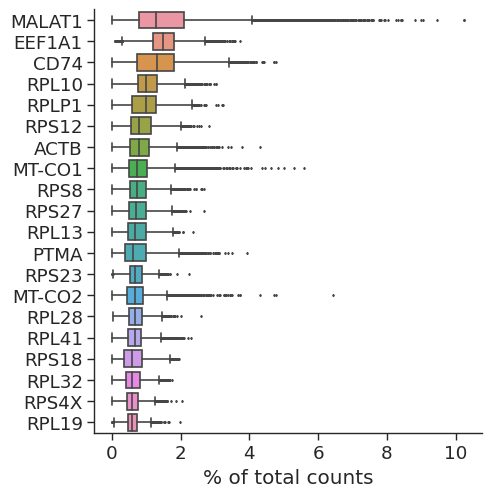

In [12]:
sc.pl.highest_expr_genes(GEXdata, n_top=20, )

In [13]:
GEXdata.var['mt'] = GEXdata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(GEXdata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

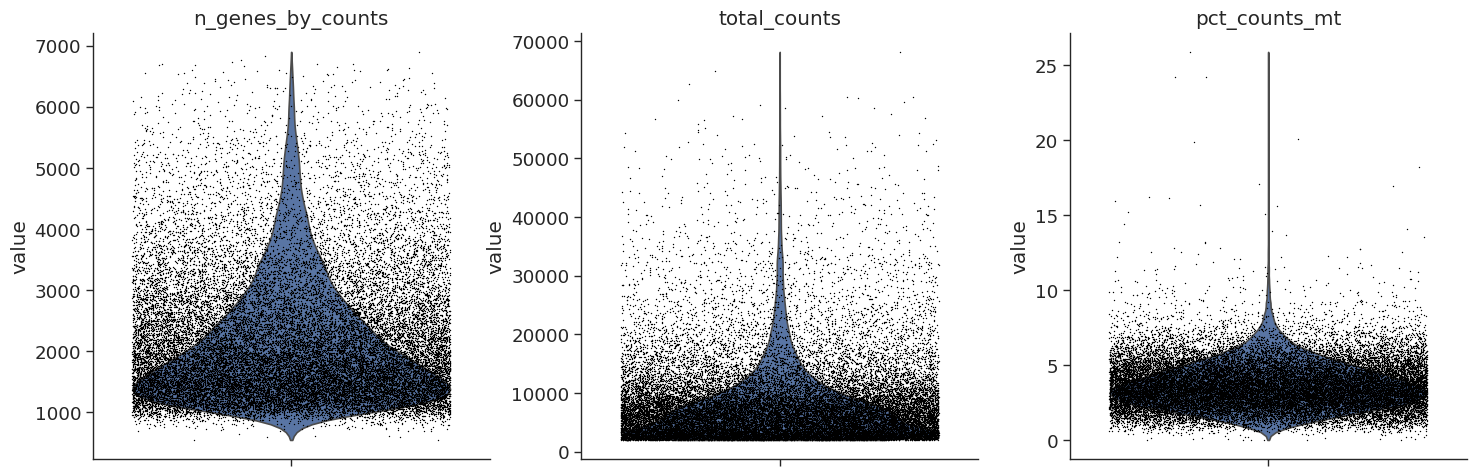

In [14]:
sc.pl.violin(GEXdata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

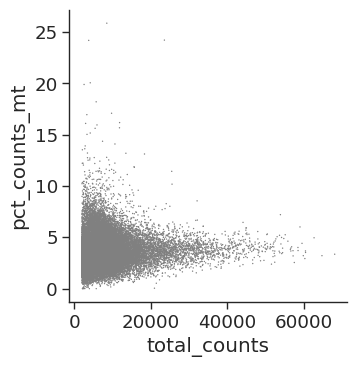

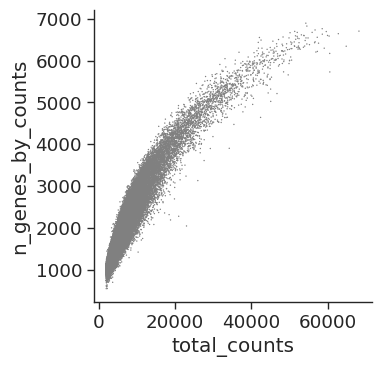

In [15]:
sc.pl.scatter(GEXdata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(GEXdata, x='total_counts', y='n_genes_by_counts')

In [16]:
sc.pp.normalize_total(GEXdata, target_sum=1e4) # total-count normalize

In [17]:
sc.pp.log1p(GEXdata) # logarithmize the data 

In [18]:
sc.pp.highly_variable_genes(GEXdata, min_mean=0.0125, max_mean=3, min_disp=0.5)

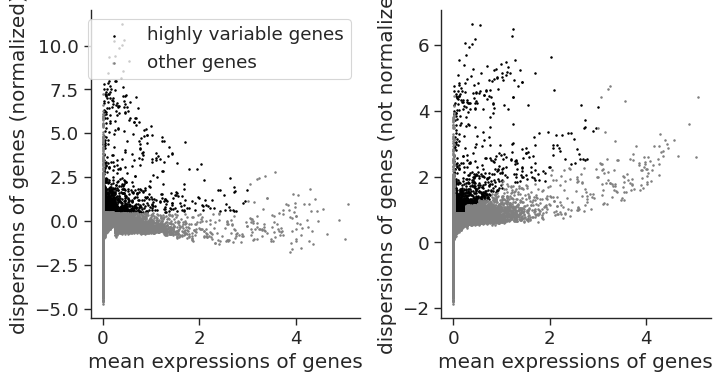

In [19]:
sc.pl.highly_variable_genes(GEXdata)

In [18]:
#### later after sc.pp.highly_variable_features

import re

# this step is to exclude any V/D/J genes from the highly variable features list
# task 3 what is highly variable featuers 

# ig genes are encoded like so:

# heavy chain V: IGHV1-1
# heavy chain D: IGHD1-2
# heavy chain J: IGHJ1-2
# light chain V: either IGLV1 or IGKV1
# light chain J: either IGLJ1 or IGKJ1
# constant gene in heavy chain: IGHM ,IGHD, IGHA1, IGHA2, IGHG1....
# constant gene in light chain: IGKC, IGLC1, IGLC2 ....

for i in GEXdata.var.index:
    if re.search('IG[HKL][VDJ]', i): # normally the regex pattern is "IG[HKL][VDJC]|TR[AB][VDJ]"
        GEXdata.var.at[i, "highly_variable"] = False

In [19]:
# set .raw attribute for later use
GEXdata.raw = GEXdata

In [20]:
GEXdata.var.highly_variable # highly variable genes is stored as an annotation

TSPAN6        False
TNMD          False
DPM1          False
SCYL3         False
C1orf112      False
              ...  
AL356417.3    False
AC010616.2    False
AL034430.1    False
AP000646.1    False
AP006216.3    False
Name: highly_variable, Length: 33538, dtype: bool

In [21]:
# regress out the effects of total counts per cell and % of mitochondrial genes. 

GEXdata = GEXdata[:, GEXdata.var.highly_variable]

In [22]:
sc.pp.regress_out(GEXdata, ['total_counts', 'pct_counts_mt'])

In [23]:
sc.pp.scale(GEXdata, max_value=10)



In [24]:
# PCA

sc.tl.pca(GEXdata, svd_solver='arpack')




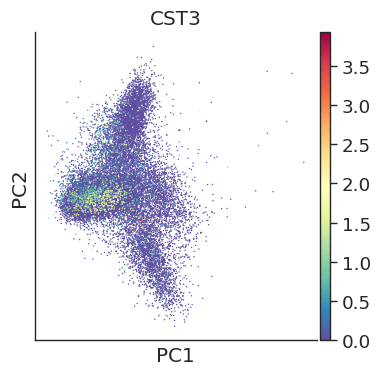

In [25]:
sc.pl.pca(GEXdata, color='CST3')

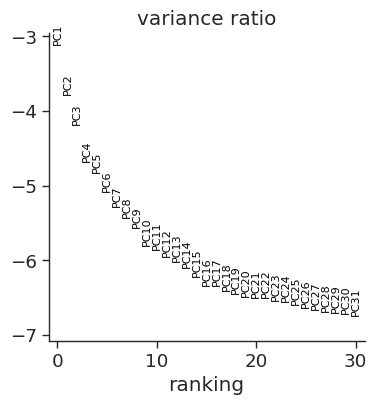

In [26]:
sc.pl.pca_variance_ratio(GEXdata, log=True) # check how many PCs to compute neighborhood relations of cells

In [27]:
GEX_results_file = "write/GEX_results.h5ad" # write the results
GEXdata.write(GEX_results_file)

In [29]:
GEXdata = sc.read_h5ad("write/GEX_results.h5ad")
GEXdata

AnnData object with n_obs × n_vars = 29818 × 1632
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'v_call_genotyped_VJ', 'd_call_VDJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ', 'duplicate_count_VJ', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_1', 'duplicate_count_VDJ_2', 'duplicate_count_VDJ_3', 'junction_aa_VDJ', 'junction_aa_VJ', 'locus_status', 'locus_status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'constan

In [1]:
# compute the neighborhood graph
GEXdata = sc.read_h5ad("write/BCR_contig.h5ad") # generated from other notebook





sc.pp.neighbors(GEXdata, n_neighbors=10, n_pcs=40)

NameError: name 'sc' is not defined

In [ ]:
sc.tl.umap(GEXdata)

In [ ]:
sc.pl.umap(GEXdata, color=['IGKC', "IGLC2"])

In [ ]:
sc.pl.umap(GEXdata, color = ["celltype_annotation"])

In [ ]:
sc.pl.umap(GEXdata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)



In [ ]:
# all the column names
GEXdata.obs.columns.values

In [ ]:
GEXdata

In [ ]:
GEXdata.obs["chain_status"] = [x + " pair" if x == "Single" else "Extra pair" if x == "Multi" else x for x in GEXdata.obs["vdj_status_summary"]]
GEXdata.obs["chain_status"]

In [ ]:
GEXdata = GEXdata[~GEXdata.obs["celltype_annotation"].isin(["MATURE_B", "B1", "CYCLING_B"])]
GEXdata

In [ ]:
# subset to cells with a pair of chains
GEXdata_ready = ddl.tl.setup_vdj_pseudobulk(GEXdata, mode=None,
                                      productive_cols = ["productive_VDJ", "productive_VJ"],
                                      extract_cols=["v_call_genotyped_VDJ", "j_call_VDJ", "v_call_genotyped_VJ", "j_call_VJ"])

In [ ]:
GEXdata_ready

In [ ]:
sc.pp.neighbors(GEXdata_ready, n_neighbors=50)
milo.make_nhoods(GEXdata_ready) # using Milopy to create pseudobulks stored as adata.obsm["nhoods"]
sc.tl.umap(GEXdata_ready)



In [ ]:
pb_GEXdata = ddl.tl.vdj_pseudobulk(
    GEXdata_ready, pbs=GEXdata_ready.obsm["nhoods"], obs_to_take="celltype_annotation", mode=None, extract_cols = ["v_call_genotyped_VDJ_main", "j_call_VDJ_main", "v_call_genotyped_VJ_main", "j_call_VJ_main"]
)

In [ ]:
pb_GEXdata

In [ ]:
sc.tl.pca(pb_GEXdata)

In [ ]:
sc.pl.pca(pb_GEXdata, color = "celltype_annotation")

In [ ]:
sc.pp.neighbors(pb_GEXdata)
sc.tl.umap(pb_GEXdata)
sc.pl.umap(pb_GEXdata, color = "celltype_annotation")

In [ ]:
# pick rootcell & terminal state
rootcell = np.argmax(pb_GEXdata.obsm["X_pca"][:, 1])
terminal_states = pd.Series(
    ["MATURE_B"],
    index=pb_GEXdata[pb_GEXdata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmin(pb_GEXdata[pb_GEXdata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_pca"][:, 1]),
        ]
    ],
)



In [ ]:
rootcell

In [ ]:
terminal_states

In [ ]:
pb_GEXdata.obs["rootcell"] = 0
pb_GEXdata.obs.at["137", "rootcell"] = 1

pb_GEXdata.obs["terminal_cell"] = 0
pb_GEXdata.obs.at["78", "terminal_cell"] = 1

In [ ]:
pb_GEXdata.obs.loc["137"]

In [ ]:
sc.pl.pca(pb_GEXdata, color = ["rootcell", "terminal_cell"], color_map="viridis")

In [ ]:
pb_GEXdata.obs.iloc[137]

In [ ]:
# Run diffusion maps
pca_projections = pd.DataFrame(pb_GEXdata.obsm["X_pca"], index=pb_GEXdata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

pr_res = palantir.core.run_palantir(
    ms_data,
    pb_GEXdata.obs_names[rootcell],
    num_waypoints=500,
    terminal_states=terminal_states.index,
)

pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]

In [ ]:
# subset without productive cols

# subset to cells with a pair of chains
GEXdata_nop = ddl.tl.setup_vdj_pseudobulk(GEXdata, mode=None,
                                      #productive_cols = ["productive_VDJ", "productive_VJ"],
                                      extract_cols=["v_call_genotyped_VDJ", "j_call_VDJ", "v_call_genotyped_VJ", "j_call_VJ"])

In [ ]:
sc.pp.neighbors(GEXdata_nop, n_neighbors=50)
milo.make_nhoods(GEXdata_nop)
sc.tl.umap(GEXdata_nop)


In [ ]:
# change terminal cell states


In [ ]:
# different combination of cells to include / exclude

# compute the neighborhood graph
GEXdata = sc.read_h5ad("write/GEX_results.h5ad")
sc.pp.neighbors(GEXdata, n_neighbors=10, n_pcs=40)

sc.tl.umap(GEXdata)
sc.pl.umap(GEXdata, color=['IGKC', "IGLC2"])
sc.pl.umap(GEXdata, color = ["celltype_annotation"])
sc.pl.umap(GEXdata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

GEXdata.obs["chain_status"] = [x + " pair" if x == "Single" else "Extra pair" if x == "Multi" else x for x in GEXdata.obs["vdj_status_summary"]]
GEXdata.obs["chain_status"] # chain status column

# negative filtering
GEXdata2 = GEXdata[~GEXdata.obs["celltype_annotation"].isin(["MATURE_B", "IMMATURE_B", "B1", "CYCLING_B"])] # check if value is not in DF
GEXdata2


# subset to cells with a pair of chains
GEXdata_ready2 = ddl.tl.setup_vdj_pseudobulk(GEXdata2, mode=None,
                                      productive_cols = ["productive_VDJ", "productive_VJ"],
                                      extract_cols=["v_call_genotyped_VDJ", "j_call_VDJ", "v_call_genotyped_VJ", "j_call_VJ"])


sc.pp.neighbors(GEXdata_ready2, n_neighbors=50)
milo.make_nhoods(GEXdata_ready2)
sc.tl.umap(GEXdata_ready2)

GEXdata_ready2


In [ ]:
pb_GEXdata2 = ddl.tl.vdj_pseudobulk(
    GEXdata_ready2, pbs=GEXdata_ready2.obsm["nhoods"], obs_to_take="celltype_annotation", mode=None, 
    extract_cols = ["v_call_genotyped_VDJ_main", "j_call_VDJ_main", "v_call_genotyped_VJ_main", "j_call_VJ_main"]
)

sc.tl.pca(pb_GEXdata2) # compute PCA
sc.pl.pca(pb_GEXdata2, color = "celltype_annotation") # plot PCA

In [ ]:
# negative filtering
GEXdata3 = GEXdata[~GEXdata.obs["celltype_annotation"].isin(["B1", "CYCLING_B"])] # check if value is not in DF
GEXdata3


# subset to cells with a pair of chains
GEXdata_ready3 = ddl.tl.setup_vdj_pseudobulk(GEXdata3, mode=None,
                                      productive_cols = ["productive_VDJ", "productive_VJ"],
                                      productive_vdj = False,
                                      productive_vj = False,
                                      extract_cols=["v_call_genotyped_VDJ", "j_call_VDJ", "v_call_genotyped_VJ", "j_call_VJ"])


sc.pp.neighbors(GEXdata_ready3, n_neighbors=50)
milo.make_nhoods(GEXdata_ready3)
sc.tl.umap(GEXdata_ready3)

GEXdata_ready3


In [ ]:
GEXdata3.obs["productive_VDJ"].unique()

In [ ]:
pb_GEXdata3 = ddl.tl.vdj_pseudobulk(
    GEXdata_ready3, pbs=GEXdata_ready3.obsm["nhoods"], obs_to_take="celltype_annotation", mode=None, 
    extract_cols = ["v_call_genotyped_VDJ_main", "j_call_VDJ_main", "v_call_genotyped_VJ_main", "j_call_VJ_main"]
)

sc.tl.pca(pb_GEXdata3) # compute PCA
sc.pl.pca(pb_GEXdata3, color = "celltype_annotation") # plot PCA

In [ ]:
# negative filtering
GEXdata4 = GEXdata[~GEXdata.obs["celltype_annotation"].isin(["CYCLING_B", "MATURE_B"])] # check if value is not in DF
GEXdata4


# subset to cells with a pair of chains
GEXdata_ready4 = ddl.tl.setup_vdj_pseudobulk(GEXdata4, mode=None,
                                      productive_cols = ["productive_VDJ", "productive_VJ"],
                                      extract_cols=["v_call_genotyped_VDJ", "j_call_VDJ", "v_call_genotyped_VJ", "j_call_VJ"])


sc.pp.neighbors(GEXdata_ready4, n_neighbors=50)
milo.make_nhoods(GEXdata_ready4)
sc.tl.umap(GEXdata_ready4)

GEXdata_ready4

In [ ]:
pb_GEXdata4 = ddl.tl.vdj_pseudobulk(
    GEXdata_ready4, pbs=GEXdata_ready4.obsm["nhoods"], obs_to_take="celltype_annotation", mode=None, 
    extract_cols = ["v_call_genotyped_VDJ_main", "j_call_VDJ_main", "v_call_genotyped_VJ_main", "j_call_VJ_main"]
)

sc.tl.pca(pb_GEXdata4) # compute PCA
sc.pl.pca(pb_GEXdata4, color = "celltype_annotation") # plot PCA

In [ ]:
sc.pp.neighbors(pb_GEXdata4)
sc.tl.umap(pb_GEXdata4) # compute UMAP
sc.pl.umap(pb_GEXdata4, color = "celltype_annotation") # plot UMAP

In [ ]:
# negative filtering
GEXdata5 = GEXdata[~GEXdata.obs["celltype_annotation"].isin(["B1","CYCLING_B"])] # check if value is not in DF
GEXdata5


# subset to cells with a pair of chains
GEXdata_ready5 = ddl.tl.setup_vdj_pseudobulk(GEXdata5, mode=None,
                                      productive_cols = ["productive_VDJ", "productive_VJ"],
                                      extract_cols=["v_call_genotyped_VDJ", "j_call_VDJ", "v_call_genotyped_VJ", "j_call_VJ"])




In [ ]:
sc.pl.pca_variance_ratio(GEXdata5, log=True) # check how many PCs to compute neighborhood relations of cells

# compute neighborhoods
sc.pp.neighbors(GEXdata_ready5, n_neighbors=50)
milo.make_nhoods(GEXdata_ready5)
sc.tl.umap(GEXdata_ready5)

GEXdata_ready5


In [ ]:
pb_GEXdata5 = ddl.tl.vdj_pseudobulk(
    GEXdata_ready5, pbs=GEXdata_ready5.obsm["nhoods"], obs_to_take="celltype_annotation", mode=None, 
    extract_cols = ["v_call_genotyped_VDJ_main", "j_call_VDJ_main", "v_call_genotyped_VJ_main", "j_call_VJ_main"]
)

sc.tl.pca(pb_GEXdata5) # compute PCA
sc.pl.pca(pb_GEXdata5, color = "celltype_annotation") # plot PCA


In [ ]:
sc.pp.neighbors(pb_GEXdata5)
sc.tl.umap(pb_GEXdata5) # compute UMAP
sc.pl.umap(pb_GEXdata5, color = "celltype_annotation") # plot UMAP

In [ ]:
pb_GEXdata5.obsm["X_pca"]


In [ ]:
pb_GEXdata5

In [ ]:
# pick rootcell & terminal state
# argmax() return the indicies of max elements in array
# [:, 1] selects all second columns of array
rootcell = np.argmin(pb_GEXdata5.obsm["X_umap"][:, 0]) 
rootcell

In [ ]:
pb_GEXdata5.obsm["X_umap"].shape

In [ ]:
terminal_states = pd.Series(
    ["MATURE_B"],
    index=pb_GEXdata5[pb_GEXdata5.obs["celltype_annotation"]=="MATURE_B"].obs_names[
        [
            np.argmax(pb_GEXdata5[pb_GEXdata5.obs["celltype_annotation"]=="MATURE_B"].obsm["X_umap"][:, 0]),
        ]
    ],
)
terminal_states

In [ ]:
pb_GEXdata5.obs["rootcell"] = 0
pb_GEXdata5.obs.at["113", "rootcell"] = 1

pb_GEXdata5.obs["terminal_cell"] = 0
pb_GEXdata5.obs.at["548", "terminal_cell"] = 1

sc.pl.umap(pb_GEXdata5, color = ["rootcell", "terminal_cell"], color_map="viridis")



In [ ]:
rootcell

In [ ]:
terminal_states

## Running Dandelion Pre-processing

In [20]:
preprocessed_GEXdata = sc.read(os.getcwd() + "/write/BCR_contigs.h5ad") # generated from other notebook

In [21]:
preprocessed_GEXdata.obs["chain_status"]

index
Human_colon_16S8159187-AGCTCTCAGTGTACTC    Single pair
Human_colon_16S8159187-TTAGGCATCAAGAAGT    Single pair
Human_colon_16S8159187-AGAATAGAGTGTGAAT     Extra pair
Human_colon_16S8159187-GGATTACAGAGAGCTC      No_contig
Human_colon_16S8159187-TTCTACACATACAGCT     Extra pair
                                              ...     
FCAImmP7803020-CGATCGGGTAGAGCTG              Orphan VJ
FCAImmP7803020-AGACGTTAGAGGTTAT             Extra pair
FCAImmP7803020-GTGTTAGCACCGGAAA             Extra pair
FCAImmP7803020-ACACCGGGTGTCTGAT              Orphan VJ
FCAImmP7803020-CGATGTAGTCTGCGGT            Single pair
Name: chain_status, Length: 29818, dtype: category
Categories (6, object): ['Extra pair', 'Extra pair-exception', 'No_contig', 'Orphan VDJ', 'Orphan VJ', 'Single pair']

In [22]:
# subset to cells with a pair of chains
GEX_adata = ddl.tl.setup_vdj_pseudobulk(preprocessed_GEXdata, mode=None,
                                      productive_cols = ["productive_VDJ", "productive_VJ"],
                                      extract_cols=["v_call_genotyped_VDJ", "j_call_VDJ", "v_call_genotyped_VJ", "j_call_VJ"])

In [23]:
GEX_adata

AnnData object with n_obs × n_vars = 15020 × 1632
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'v_call_genotyped_VJ', 'd_call_VDJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ', 'duplicate_count_VJ', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_1', 'duplicate_count_VDJ_2', 'duplicate_count_VDJ_3', 'junction_aa_VDJ', 'junction_aa_VJ', 'locus_status', 'locus_status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'constan

In [24]:
GEX_adata.obs["celltype_annotation"]

index
Human_colon_16S8159187-AGCTCTCAGTGTACTC      MATURE_B
Human_colon_16S8159187-TTAGGCATCAAGAAGT            B1
Human_colon_16S8159187-AGAATAGAGTGTGAAT      MATURE_B
Human_colon_16S8159187-CTGCTGTTCCACGTTC            B1
Human_colon_16S8159187-GCGCCAAGTAGATTAG      MATURE_B
                                              ...    
FCAImmP7803020-AGGGATGGTCGCGAAA              MATURE_B
FCAImmP7803020-GGATTACCAGATCCAT            IMMATURE_B
FCAImmP7803020-AGACGTTAGAGGTTAT            IMMATURE_B
FCAImmP7803020-GTGTTAGCACCGGAAA            IMMATURE_B
FCAImmP7803020-CGATGTAGTCTGCGGT              MATURE_B
Name: celltype_annotation, Length: 15020, dtype: category
Categories (10, object): ['B1', 'CYCLING_B', 'IMMATURE_B', 'LARGE_PRE_B', ..., 'PLASMA_B', 'PRE_PRO_B', 'PRO_B', 'SMALL_PRE_B']

In [25]:
GEX_adata.obs

n_counts  n_genes  \
index                                                        
Human_colon_16S8159187-AGCTCTCAGTGTACTC   12236.0     2627   
Human_colon_16S8159187-TTAGGCATCAAGAAGT   11355.0     2709   
Human_colon_16S8159187-AGAATAGAGTGTGAAT    8394.0     2161   
Human_colon_16S8159187-CTGCTGTTCCACGTTC    5023.0     1603   
Human_colon_16S8159187-GCGCCAAGTAGATTAG    4774.0     1354   
...                                           ...      ...   
FCAImmP7803020-AGGGATGGTCGCGAAA            2079.0      785   
FCAImmP7803020-GGATTACCAGATCCAT            2077.0      811   
FCAImmP7803020-AGACGTTAGAGGTTAT            2064.0      890   
FCAImmP7803020-GTGTTAGCACCGGAAA            2048.0      737   
FCAImmP7803020-CGATGTAGTCTGCGGT            2018.0      826   

                                                           file      mito  \
index                                                                       
Human_colon_16S8159187-AGCTCTCAGTGTACTC  Human_colon_16S8159187  0.032772   
Human_colon_16S8159187-TTAGGCATCAAGAAGT  Human_colon_16S8159187  0.035315   
Human_colon_16S8159187-AGAATAGAGTGTGAAT  Human_colon_16S8159187  0.024184   
Human_colon_16S8159187-CTGCTGTTCCACGTTC  Human_colon_16S8159187  0.052757   
Human_colon_16S8159187-GCGCCAAGTAGATTAG  Human_colon_16S8159187  0.075408   
...                                                         ...       ...   
FCAImmP7803020-AGGGATGGTCGCGAAA                  FCAImmP7803020  0.040404   
FCAImmP7803020-GGATTACCAGATCCAT                  FCAImmP7803020  0.050072   
FCAImmP7803020-AGACGTTAGAGGTTAT                  FCAImmP7803020  0.021318   
FCAImmP7803020-GTGTTAGCACCGGAAA                  FCAImmP7803020  0.016113   
FCAImmP7803020-CGATGTAGTCTGCGGT                  FCAImmP7803020  0.038652   

                                         doublet_scores predicted_doublets  \
index                                                                        
Human_colon_16S8159187-AGCTCTCAGTGTACTC        0.293388               True   
Human_colon_16S8159187-TTAGGCATCAAGAAGT        0.136000              False   
Human_colon_16S8159187-AGAATAGAGTGTGAAT        0.195231              False   
Human_colon_16S8159187-CTGCTGTTCCACGTTC        0.121951              False   
Human_colon_16S8159187-GCGCCAAGTAGATTAG        0.136000              False   
...                                                 ...                ...   
FCAImmP7803020-AGGGATGGTCGCGAAA                0.020725              False   
FCAImmP7803020-GGATTACCAGATCCAT                0.014286              False   
FCAImmP7803020-AGACGTTAGAGGTTAT                0.023443              False   
FCAImmP7803020-GTGTTAGCACCGGAAA                0.028409              False   
FCAImmP7803020-CGATGTAGTCTGCGGT                0.008183              False   

                                        old_annotation_uniform organ  \
index                                                                  
Human_colon_16S8159187-AGCTCTCAGTGTACTC                    nan    GU   
Human_colon_16S8159187-TTAGGCATCAAGAAGT                    nan    GU   
Human_colon_16S8159187-AGAATAGAGTGTGAAT                    nan    GU   
Human_colon_16S8159187-CTGCTGTTCCACGTTC                    nan    GU   
Human_colon_16S8159187-GCGCCAAGTAGATTAG                    nan    GU   
...                                                        ...   ...   
FCAImmP7803020-AGGGATGGTCGCGAAA                         B CELL    SP   
FCAImmP7803020-GGATTACCAGATCCAT                            nan    SP   
FCAImmP7803020-AGACGTTAGAGGTTAT                         B CELL    SP   
FCAImmP7803020-GTGTTAGCACCGGAAA                            nan    SP   
FCAImmP7803020-CGATGTAGTCTGCGGT                         B CELL    SP   

                                             Sort_id  age  ...  \
index                                                      ...   
Human_colon_16S8159187-AGCTCTCAGTGTACTC  CD45P_CD45N   15  ...   
Human_colon_16S8159187-TTAGGCATCAAGAAGT  CD45P_CD45N   15  ...   
Human_colon_16S8

In [53]:
# negative filtering
GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B"])] 


In [54]:
sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=50)
milo.make_nhoods(GEX_adata)
sc.tl.umap(GEX_adata)

In [55]:
GEX_adata.obsm["nhoods"] # cell by pseudobulk matrix

<2207x160 sparse matrix of type '<class 'numpy.float32'>'
	with 14827 stored elements in Compressed Sparse Row format>

In [56]:
GEX_adata.obs["anno_lvl_2_final_clean"]

index
Human_colon_16S8159187-GTACGTATCTGTCCGT    LARGE_PRE_B
FCAImmP7555859-ACTGCTCTCTGCTGCT            LARGE_PRE_B
FCAImmP7555859-ATCATCTTCAGCTGGC            LARGE_PRE_B
FCAImmP7555859-CTGGTCTTCCTACAGA            LARGE_PRE_B
FCAImmP7555859-AACACGTAGTAAGTAC            SMALL_PRE_B
                                              ...     
FCAImmP7803020-TTGGAACCATTTGCTT             IMMATURE_B
FCAImmP7803020-ATGTGTGTCCCTTGCA             IMMATURE_B
FCAImmP7803020-GGATTACCAGATCCAT             IMMATURE_B
FCAImmP7803020-AGACGTTAGAGGTTAT             IMMATURE_B
FCAImmP7803020-GTGTTAGCACCGGAAA             IMMATURE_B
Name: anno_lvl_2_final_clean, Length: 2207, dtype: category
Categories (7, object): ['IMMATURE_B', 'LARGE_PRE_B', 'LATE_PRO_B', 'PLASMA_B', 'PRE_PRO_B', 'PRO_B', 'SMALL_PRE_B']

In [58]:
pb_GEX_adata = ddl.tl.vdj_pseudobulk(
    GEX_adata, pbs=GEX_adata.obsm["nhoods"], obs_to_take="celltype_annotation", mode="B", 
    extract_cols = None
)

C:\Users\chris\anaconda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.


C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


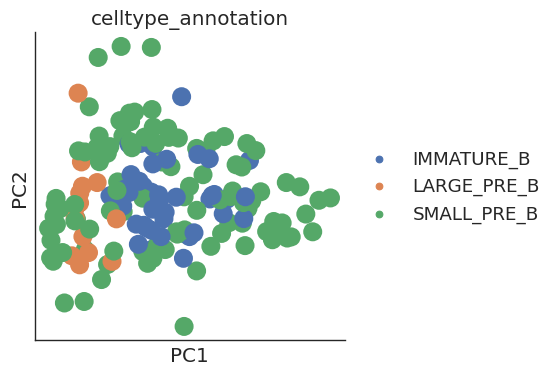

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


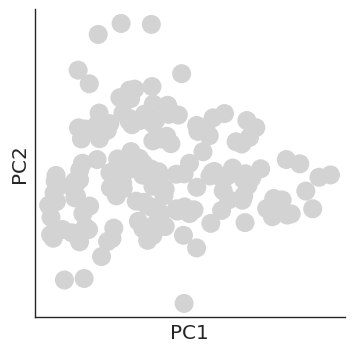

C:\Users\chris\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.


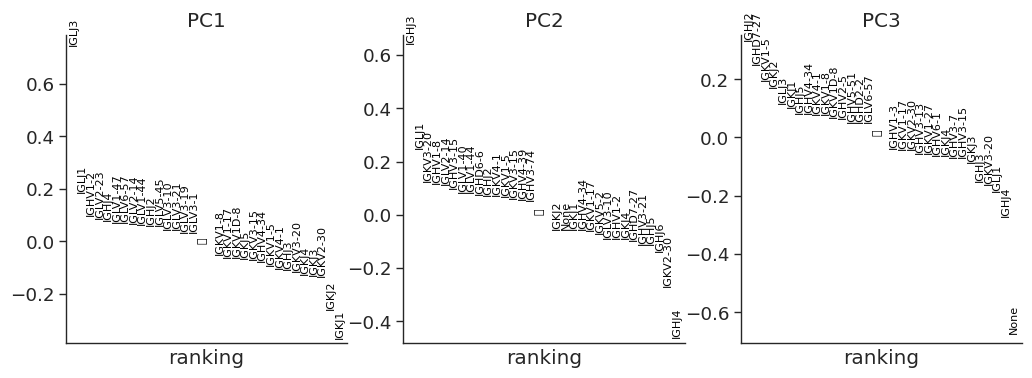

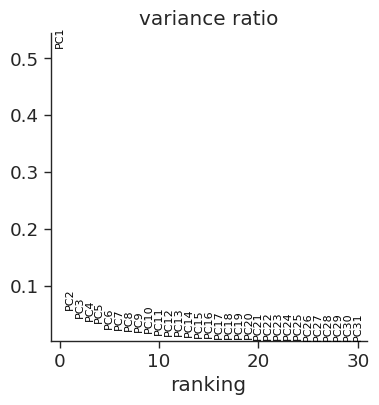

In [59]:
# compute PCA

sc.tl.pca(pb_GEX_adata) # compute PCA coordinates, loadings and variance
sc.pl.pca(pb_GEX_adata, color="celltype_annotation")
sc.pl.pca_overview(pb_GEX_adata)

In [60]:
# pick rootcell
rootcell = np.argmax(pb_GEX_adata.obsm["X_pca"][:, 0])

# 
terminal_states = pd.Series(
    ["IMMATURE_B"],
    index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmin(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_pca"][:, 1]),
        ]
    ],
)

# Run diffusion maps
pca_projections = pd.DataFrame(pb_GEX_adata.obsm["X_pca"], index=pb_GEX_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

pr_res = palantir.core.run_palantir(
    ms_data,
    pb_GEX_adata.obs_names[rootcell],
    num_waypoints=500,
    terminal_states=terminal_states.index,
)

pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]


Determing nearest neighbor graph...
Sampling and flocking waypoints...
Time for determining waypoints: 0.0004747788111368815 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.6153638442357381 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [64]:
pb_GEX_adata

AnnData object with n_obs × n_vars = 160 × 166
    obs: 'celltype_annotation', 'celltype_annotation_fraction', 'cell_count', 'pseudotime', 'prob_IMMATURE_B'
    uns: 'pca', 'celltype_annotation_colors'
    obsm: 'pbs', 'X_pca'
    varm: 'PCs'

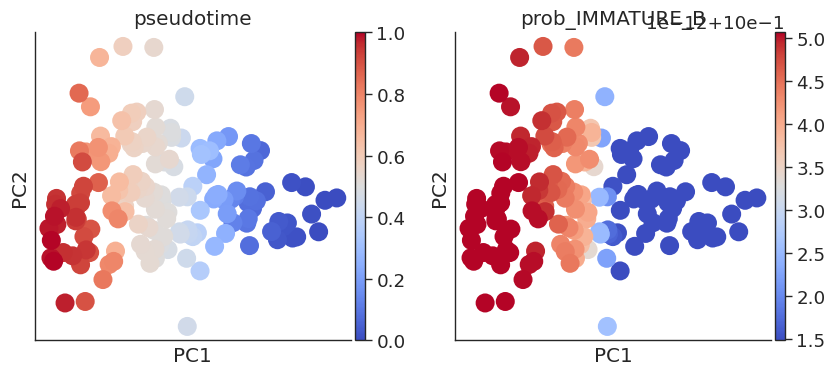

In [65]:
pb_GEX_adata = ddl.tl.pseudotime_transfer(pb_GEX_adata, pr_res)
sc.pl.pca(
    pb_GEX_adata,
    color=["pseudotime", "prob_IMMATURE_B"],
    color_map="coolwarm",
)

In [31]:
# using mode B - skip this step if pseudobulk is run above

preprocessed_GEXdata = sc.read(os.getcwd() + "/write/BCR_contigs.h5ad")

GEX_adata = ddl.tl.setup_vdj_pseudobulk(preprocessed_GEXdata, mode="B",
#                                       productive_cols = ["productive_VDJ", "productive_VJ"]
                                        productive_vdj = False,
                                        productive_vj = False
                                       )

# negative filtering
#GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B"])] 

sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=50)
milo.make_nhoods(GEX_adata)
sc.tl.umap(GEX_adata)

pb_GEX_adata = ddl.tl.vdj_pseudobulk(
    GEX_adata, pbs=GEX_adata.obsm["nhoods"], obs_to_take="celltype_annotation", mode="B", extract_cols=None
)

C:\Users\chris\anaconda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.


In [33]:
pb_GEX_adata # we have a VJ feature space pseudobulk object

AnnData object with n_obs × n_vars = 671 × 182
    obs: 'celltype_annotation', 'celltype_annotation_fraction', 'cell_count'
    obsm: 'pbs'

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


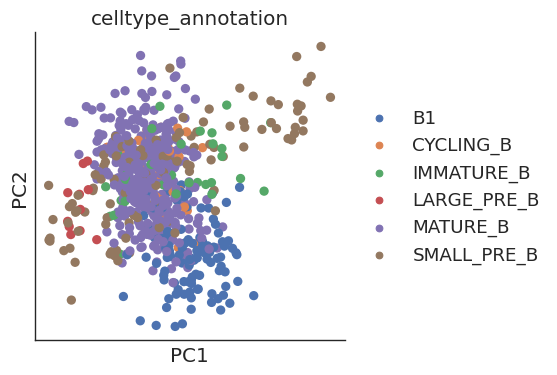

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


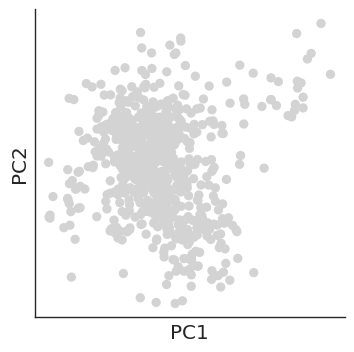

C:\Users\chris\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.


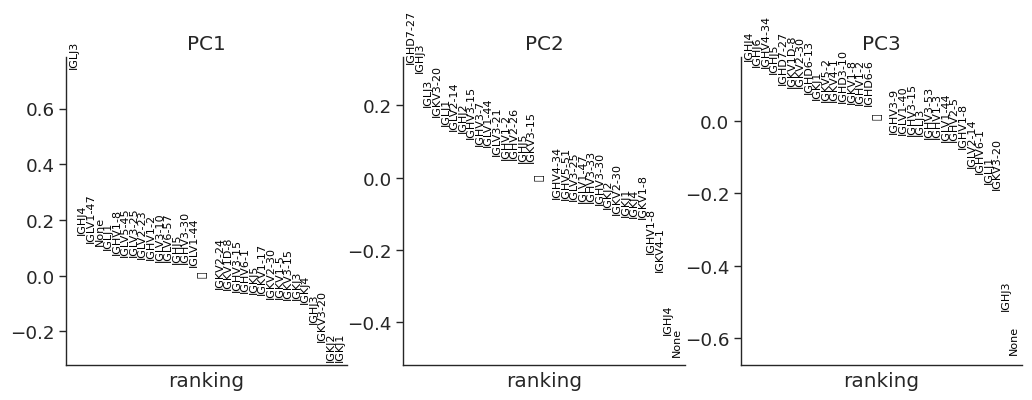

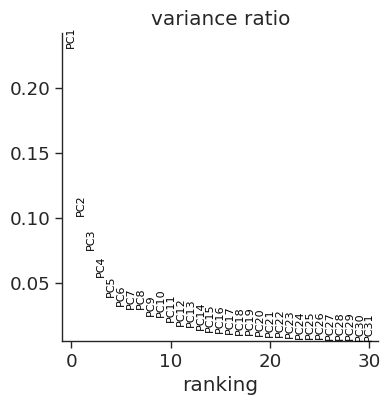

In [35]:
# compute PCA

sc.tl.pca(pb_GEX_adata) # compute PCA coordinates, loadings and variance
sc.pl.pca(pb_GEX_adata, color="celltype_annotation")
sc.pl.pca_overview(pb_GEX_adata)

In [43]:
# pick rootcell
rootcell = np.argmax(pb_GEX_adata.obsm["X_pca"][:, 0])

# 
terminal_states = pd.Series(
    ["IMMATURE_B"],
    index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmin(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_pca"][:, 1]),
        ]
    ],
)

# Run diffusion maps
pca_projections = pd.DataFrame(pb_GEX_adata.obsm["X_pca"], index=pb_GEX_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

pr_res = palantir.core.run_palantir(
    ms_data,
    pb_GEX_adata.obs_names[rootcell],
    num_waypoints=500,
    terminal_states=terminal_states.index,
)

pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]


Determing nearest neighbor graph...
Sampling and flocking waypoints...
Time for determining waypoints: 0.0008233149846394856 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 1.2872235735257467 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9997
Correlation at iteration 2: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [39]:
rootcell

429

In [40]:
terminal_states

170    IMMATURE_B
dtype: object

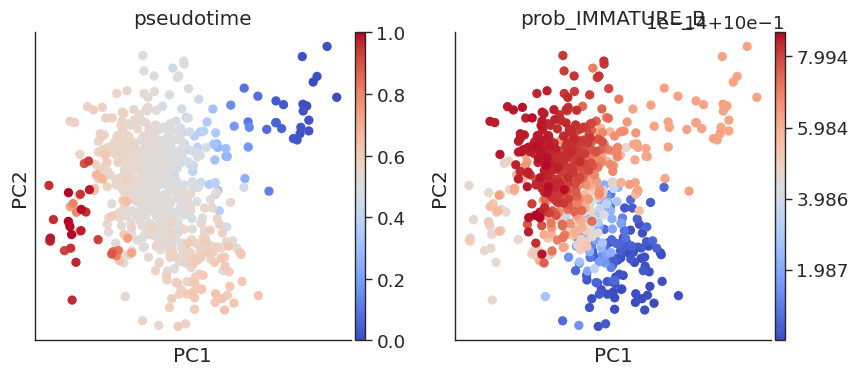

In [47]:
pb_GEX_adata = ddl.tl.pseudotime_transfer(pb_GEX_adata, pr_res)
sc.pl.pca(
    pb_GEX_adata,
    color=["pseudotime", "prob_IMMATURE_B"],
    color_map="coolwarm",
)

number of cells removed due to not belonging to any neighbourhood 42


C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


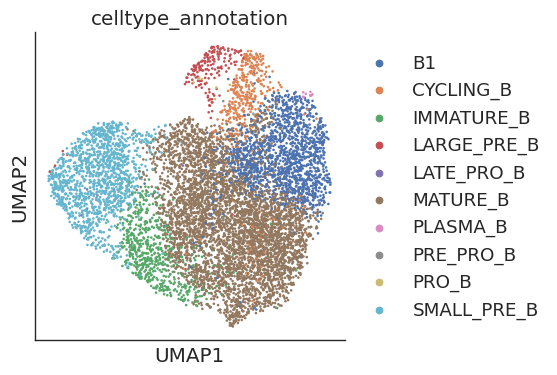

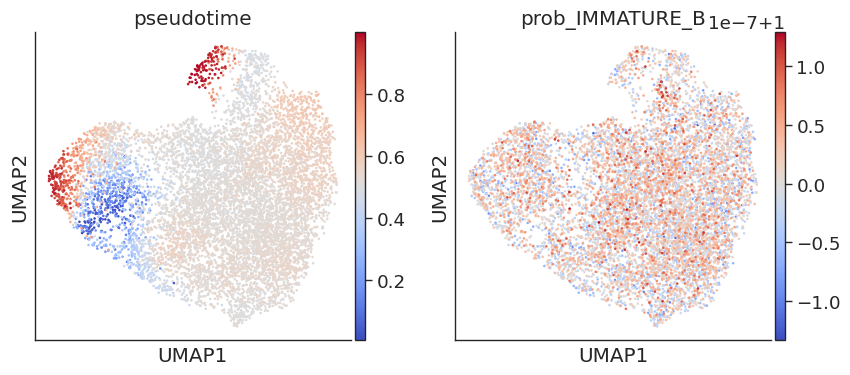

In [48]:
bdata = ddl.tl.project_pseudotime_to_cell(
    GEX_adata, pb_GEX_adata, terminal_states.values
)
sc.pl.umap(bdata, color=["celltype_annotation"])
sc.pl.umap(
    bdata,
    color=["pseudotime", "prob_IMMATURE_B"],
    color_map="coolwarm",
)

In [46]:
pb_GEX_adata

AnnData object with n_obs × n_vars = 671 × 182
    obs: 'celltype_annotation', 'celltype_annotation_fraction', 'cell_count', 'pseudotime', 'prob_IMMATURE_B'
    uns: 'pca', 'celltype_annotation_colors'
    obsm: 'pbs', 'X_pca'
    varm: 'PCs'

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


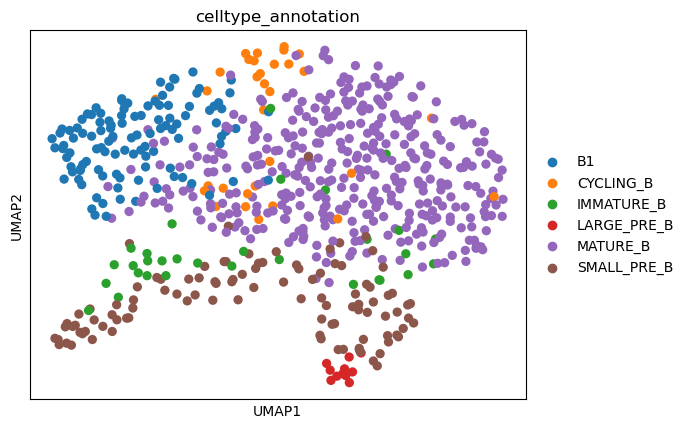

In [167]:
# compute UMAP

sc.pp.neighbors(pb_GEX_adata, n_neighbors=50)
sc.tl.umap(pb_GEX_adata)
sc.pl.umap(pb_GEX_adata, color = "celltype_annotation")

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


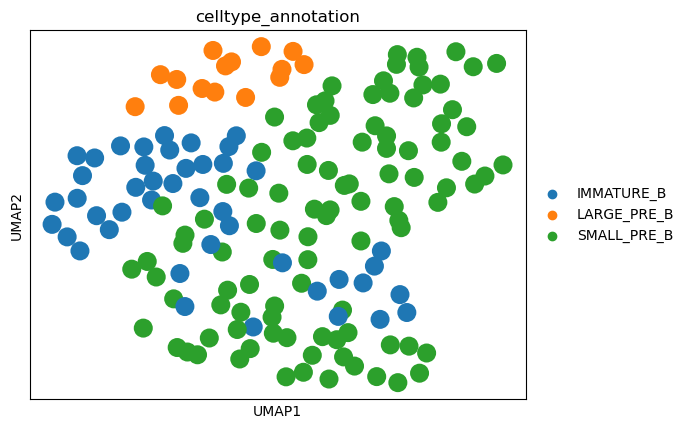

In [150]:
# compute UMAP

sc.pp.neighbors(pb_GEX_adata, n_neighbors=100)
sc.tl.umap(pb_GEX_adata)
sc.pl.umap(pb_GEX_adata, color = "celltype_annotation")

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


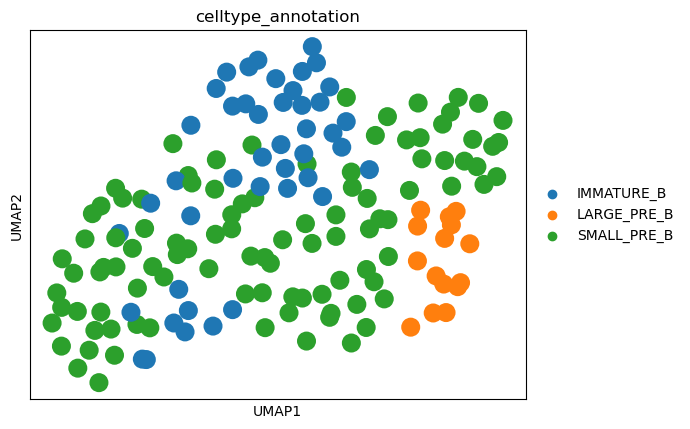

In [151]:
# compute UMAP

sc.pp.neighbors(pb_GEX_adata, n_neighbors=200)
sc.tl.umap(pb_GEX_adata)
sc.pl.umap(pb_GEX_adata, color = "celltype_annotation")

In [161]:
# pick rootcell & terminal state
rootcell = np.argmax(pb_GEX_adata.obsm["X_pca"][:, 1])
terminal_states = pd.Series(
    ["IMMATURE_B"],
    index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmin(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_pca"][:, 1]),
        ]
    ],
)



In [160]:
np.argmax(pb_GEX_adata.obsm["X_pca"][:, 1]) # returns the indicies of the max values [first row: last_row, column_0]

89

In [162]:
rootcell

89

In [163]:
terminal_states

62    IMMATURE_B
dtype: object

In [164]:
pb_GEX_adata.obs["rootcell"] = 0
pb_GEX_adata.obs.at["137", "rootcell"] = 1

pb_GEX_adata.obs["terminal_cell"] = 0
pb_GEX_adata.obs.at["78", "terminal_cell"] = 1

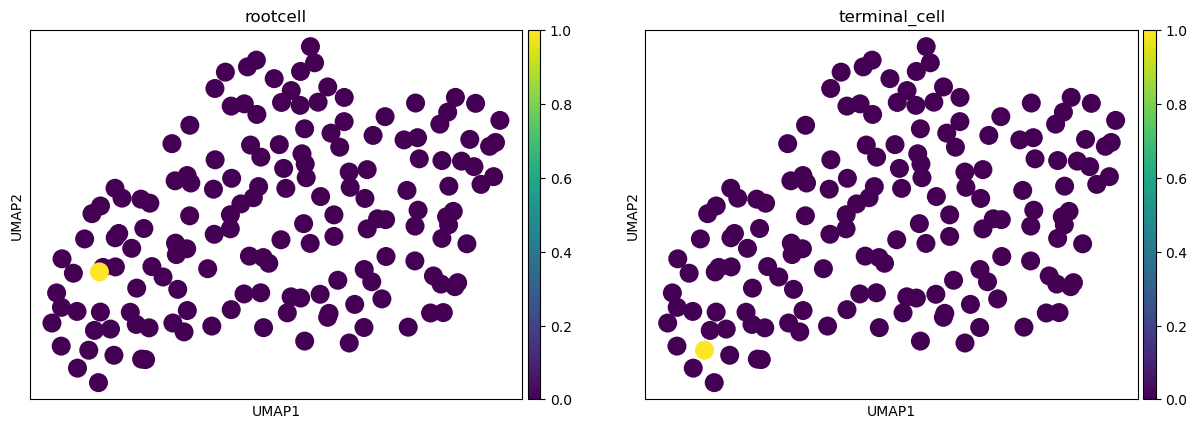

In [165]:
sc.pl.umap(pb_GEX_adata, color = ["rootcell", "terminal_cell"], color_map="viridis")

In [4]:
# using mode B - skip this step if pseudobulk is run above

preprocessed_GEXdata = sc.read(os.getcwd() + "/write/BCR_contigs.h5ad")

GEX_adata = ddl.tl.setup_vdj_pseudobulk(preprocessed_GEXdata, mode="B",
#                                       productive_cols = ["productive_VDJ", "productive_VJ"]
                                        productive_vdj = False,
                                        productive_vj = False
                                       )

# negative filtering
# GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B", "PLASMA_B", "LATE_PRO_B", "PRO_B", "PRE_PRO_B"])] 
GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B"])] 



```
GEX_adata = ddl.tl.setup_vdj_pseudobulk(preprocessed_GEXdata, mode="B",
#                                       productive_cols = ["productive_VDJ", "productive_VJ"]
                                        productive_vdj = False,
                                        productive_vj = False
                                       )
```
`setup_vdj_pseudobulk()` - function to prepare anndata for computing the pseudobulk vdj feature space.



In [9]:
# sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=20)
sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=50)


In [10]:
# milo.make_nhoods(GEX_adata, prop=0.3)
milo.make_nhoods(GEX_adata, prop=0.1)

(array([ 1.,  1.,  2.,  0.,  2.,  5.,  4.,  4.,  3.,  2.,  2.,  8.,  3.,
         5.,  8.,  4.,  5.,  6.,  3.,  4.,  4.,  7.,  4., 11.,  1.,  1.,
         5.,  2.,  4.,  7.,  6.,  1.,  4.,  0.,  2.,  9.,  7.,  0.,  4.,
         5.,  3.,  5.,  2.,  6.,  3.,  5.,  4.,  1.,  2.,  4.,  2.,  1.,
         2.,  3.,  3.,  3.,  0.,  2.,  4.,  1.,  0.,  1.,  0.,  0.,  4.,
         2.,  1.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  2.,  0.,
         0.,  0.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 56.        ,  57.16999817,  58.34000015,  59.50999832,
         60.68000031,  61.84999847,  63.02000046,  64.19000244,
         65.36000061,  66.52999878,  67.69999695,  68.87000275,
         70.04000092,  71.20999908,  72.37999725,  73.55000305,
         74.72000122,  75.88999939,  77.05999756,  78.23000336,
         79.40000153,  80.56999969,  81.73999786,  82.91000366,
         84.08000183,  85.25      ,  86.41999817, 

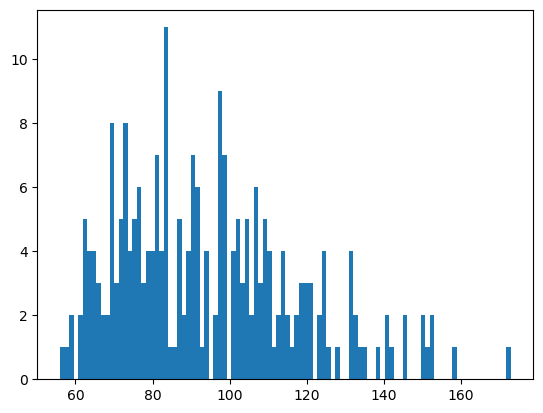

In [11]:
import matplotlib.pyplot as plt
nhood_size = np.array(GEX_adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins = 100)

In [12]:
sc.tl.umap(GEX_adata)

pb_GEX_adata = ddl.tl.vdj_pseudobulk(
    GEX_adata, pbs=GEX_adata.obsm["nhoods"], obs_to_take="celltype_annotation", mode="B", extract_cols=None
)

C:\Users\chris\anaconda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.


C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


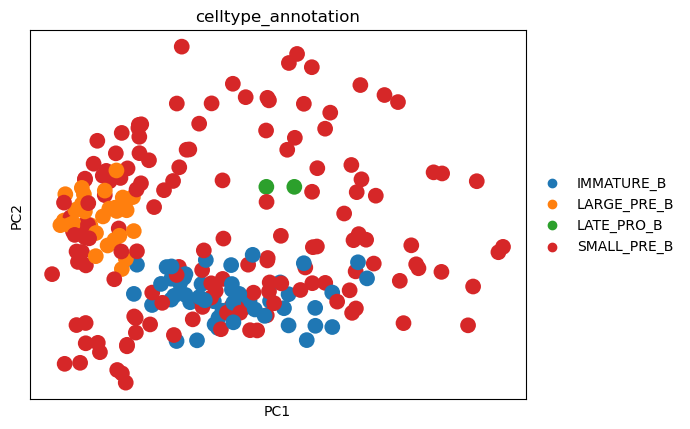

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


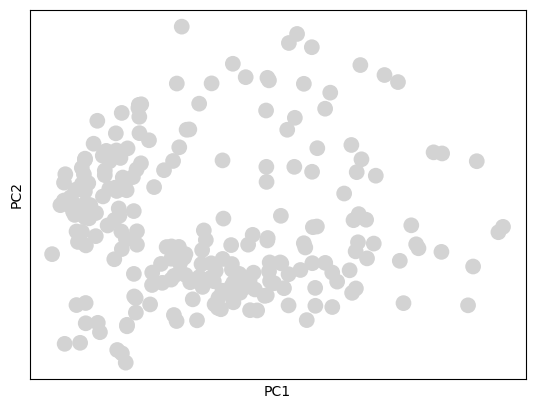

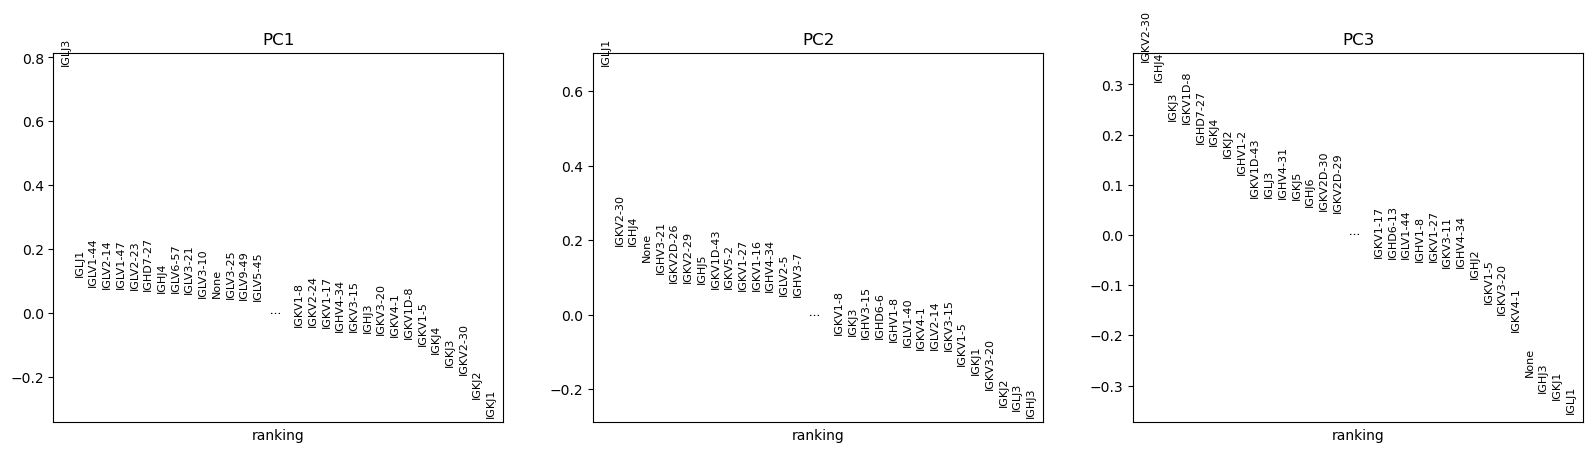

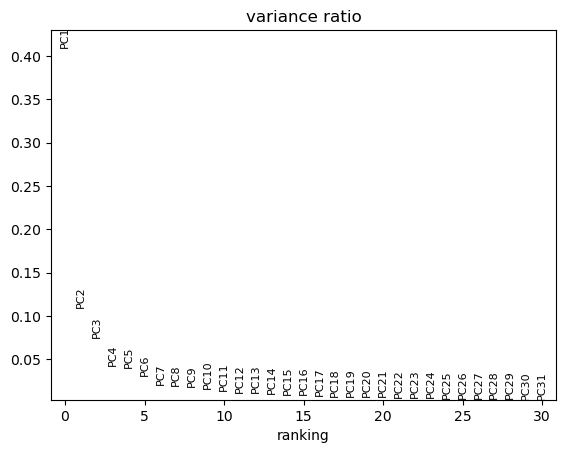

In [13]:
# compute PCA

sc.tl.pca(pb_GEX_adata) # compute PCA coordinates, loadings and variance
sc.pl.pca(pb_GEX_adata, color="celltype_annotation")
sc.pl.pca_overview(pb_GEX_adata)

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


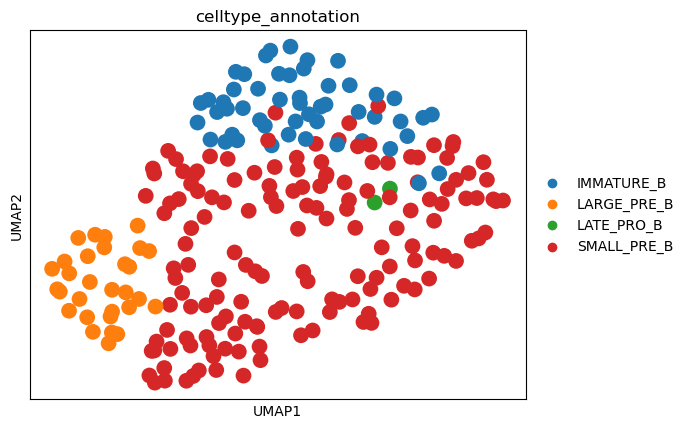

In [14]:

sc.pp.neighbors(pb_GEX_adata, n_neighbors=100)
sc.tl.umap(pb_GEX_adata)
sc.pl.umap(pb_GEX_adata, color=["celltype_annotation"])


In [17]:
# pick rootcell & terminal state
# rootcell = np.argmax(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LATE_PRO_B"])
# terminal_states = pd.Series(
#     ["IMMATURE_B"],
#     index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
#         [
#             np.argmin(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_pca"][:, 1]),
#         ]
#     ],
# )

# set a rootcell on one of the LATE_PRO_B cells
rootcell = np.where(pb_GEX_adata.obs["celltype_annotation"]=="LATE_PRO_B")[0][0]
rootcell

23

In [18]:
terminal_states = pd.Series(
    ["IMMATURE_B"],
    index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmin(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_pca"][:, 1]),
        ]
    ],
)
terminal_states

76    IMMATURE_B
dtype: object

In [212]:
# Run diffusion maps
pca_projections = pd.DataFrame(pb_GEX_adata.obsm["X_pca"], index=pb_GEX_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

pr_res = palantir.core.run_palantir(
    ms_data,
    pb_GEX_adata.obs_names[rootcell],
    num_waypoints=500,
    terminal_states=terminal_states.index,
)

pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]


Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
Sampling and flocking waypoints...
Time for determining waypoints: 0.0007028937339782715 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.7574546257654826 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9998
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


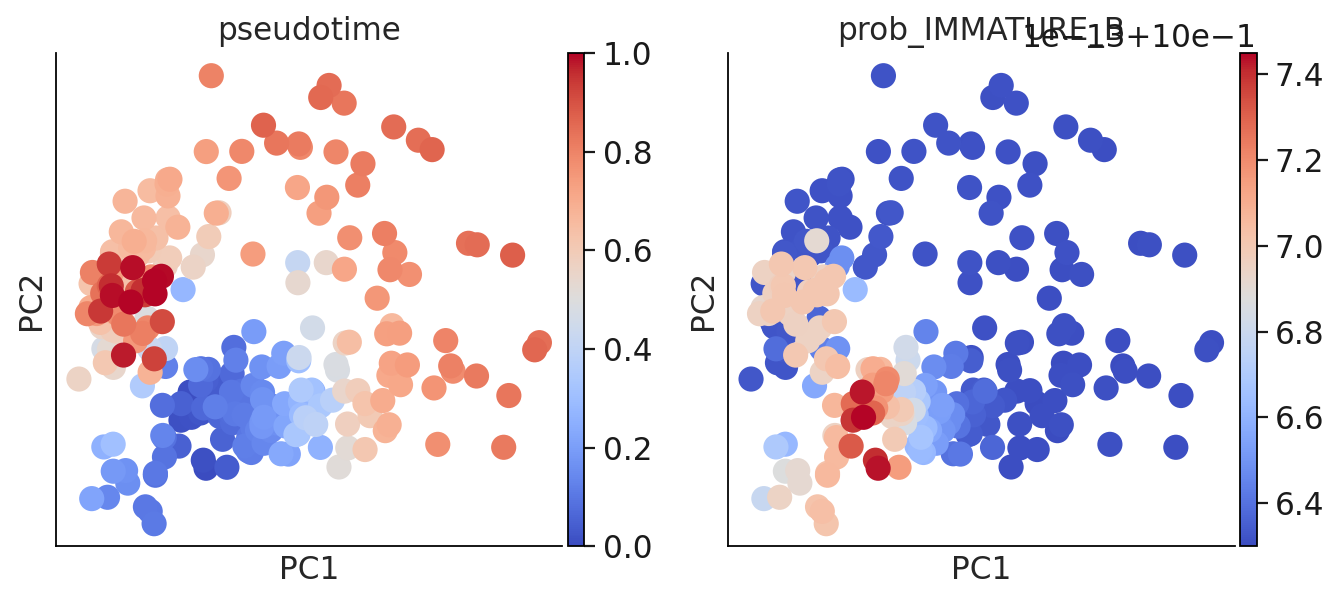

In [213]:
pb_GEX_adata = ddl.tl.pseudotime_transfer(pb_GEX_adata, pr_res)
sc.pl.pca(
    pb_GEX_adata,
    color=["pseudotime", "prob_IMMATURE_B"],
    color_map="coolwarm",
)

Start of the trajectory was LATE_PRO_B. The start is from 0 to 1.0.

number of cells removed due to not belonging to any neighbourhood 6


C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


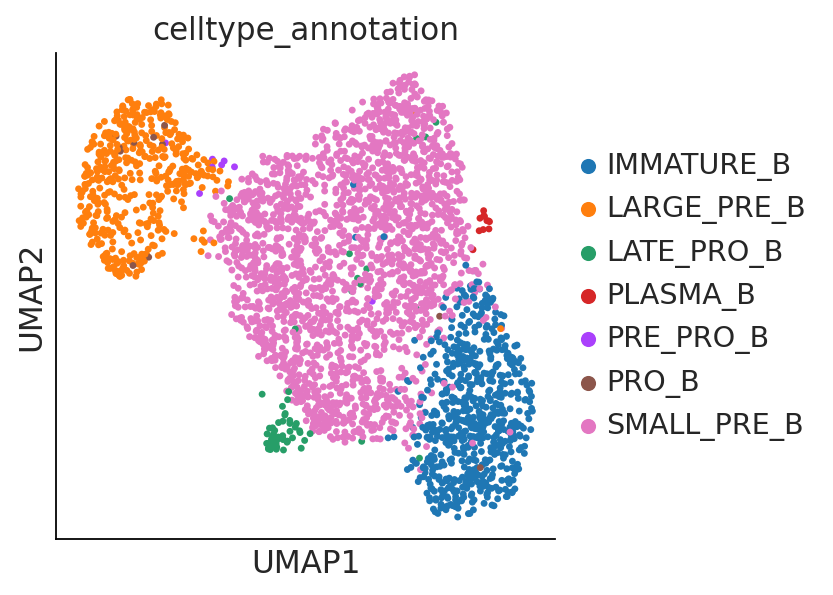

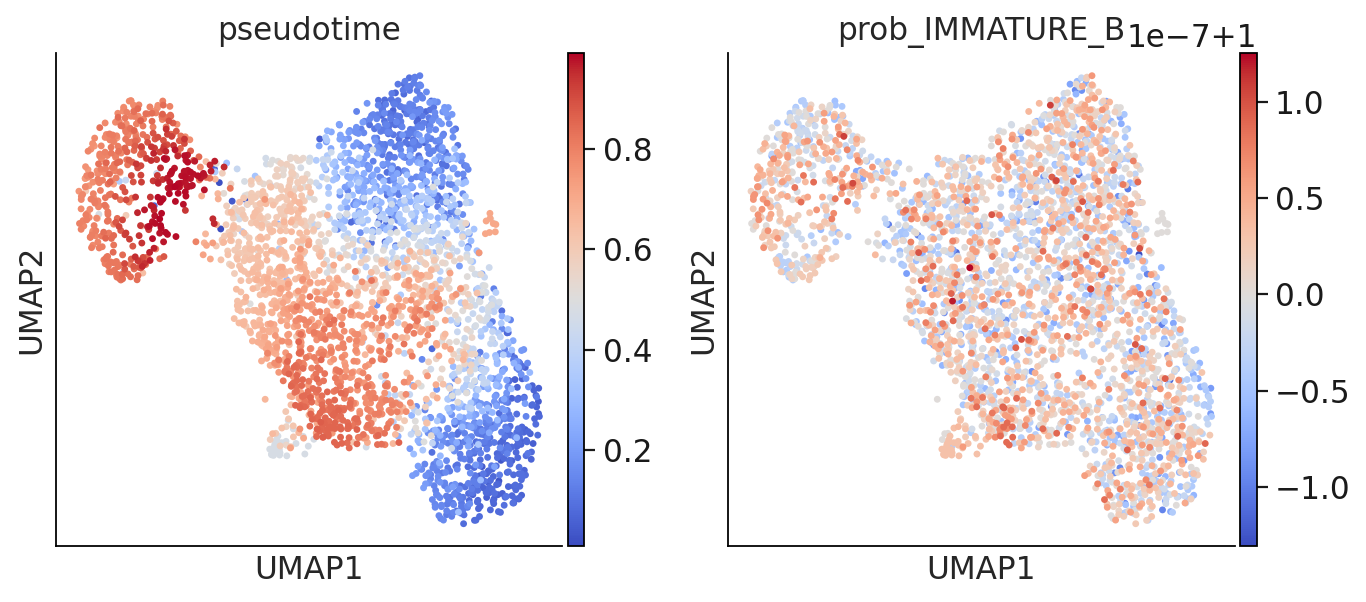

In [214]:
bdata = ddl.tl.project_pseudotime_to_cell(
    GEX_adata, pb_GEX_adata, terminal_states.values
)
sc.pl.umap(bdata, color=["celltype_annotation"])
sc.pl.umap(
    bdata,
    color=["pseudotime", "prob_IMMATURE_B"],
    color_map="coolwarm",
)

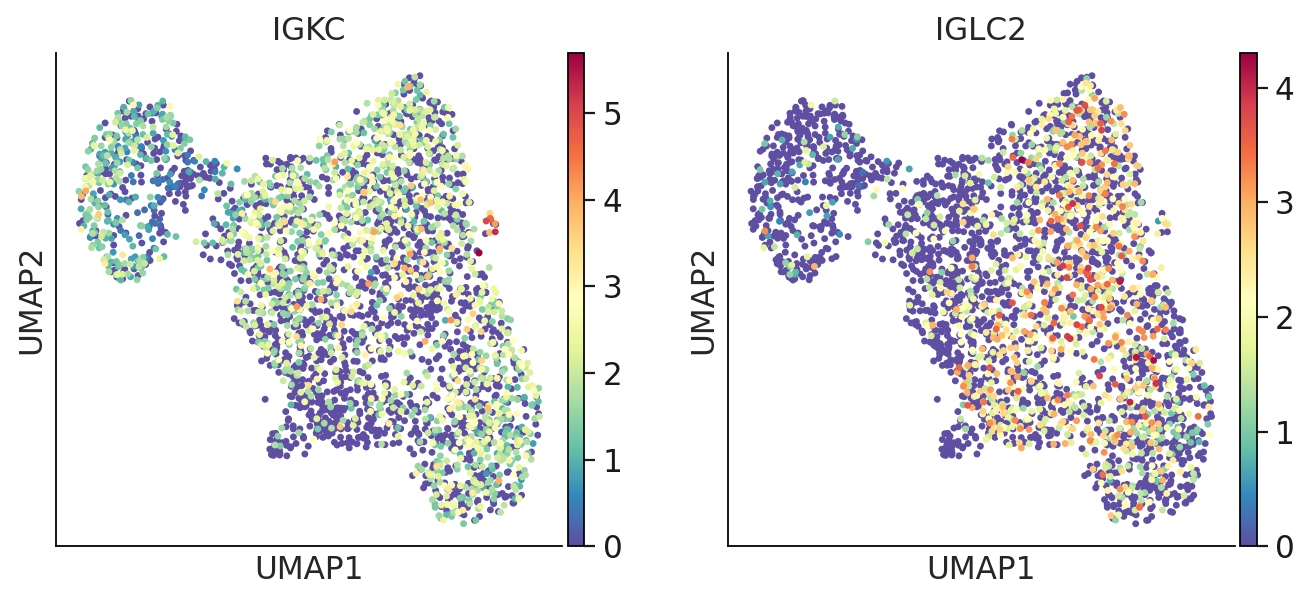

In [215]:
sc.pl.umap(bdata, color = ["IGKC", "IGLC2"])

We firstly subset it to immature, pro-b, late pro-b, 

We firstly subset it to immature, small & large pro-b and late pro-b - the developing B cells

we did a pseduobulk procedure

we asked the bcr recombination events - 

we set the root cell to be late pro-b, because thats is the earliest known cell type

limitation of the tool - not clear cut - the purpose of my project is: to figure out whether we need to add the backward edges in Palantir (it is filtered out) & what are the right condition / dataset for this to work. 

We will remove the pro-b stage (the two dots) - instead of starting trajectory on pro-b, we will use the large pre-b stage next to pro-b. 

We want the reverse of the trajectory in pseudo-time. Left to the right is preferred.


In [185]:
rootcell = np.argmax(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obsm["X_pca"][:, 1])
rootcell


60

In [203]:
terminal_states2 = pd.Series(
    ["IMMATURE_B"],
    index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmax(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_pca"][:, 0]),
        ]
    ],
)

terminal_states2


285    IMMATURE_B
dtype: object

In [191]:
pb_GEX_adata.obs_names[rootcell2]

'60'

In [193]:
# Run diffusion maps
pca_projections = pd.DataFrame(pb_GEX_adata.obsm["X_pca"], index=pb_GEX_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)



Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [200]:
pca_projections

0         1         2         3         4         5         6   \
0   -0.203384  0.066118 -0.019299  0.074359  0.072966  0.235087 -0.009316   
1   -0.219661  0.008141 -0.104398 -0.073749  0.130596  0.181977 -0.091989   
2   -0.176686  0.131219 -0.115084 -0.098279 -0.183478 -0.025750 -0.068690   
3    0.239101  0.049458 -0.039346 -0.160146  0.051447 -0.016459 -0.017869   
4    0.131301  0.058554 -0.163692 -0.008686 -0.043584  0.043995  0.030543   
..        ...       ...       ...       ...       ...       ...       ...   
555  0.152734 -0.115256 -0.030574  0.012831  0.006590  0.010706 -0.089132   
556 -0.098528  0.032162 -0.023655 -0.169593  0.119998 -0.053322 -0.064464   
557  0.107356 -0.035825 -0.046445 -0.086304 -0.017552 -0.067904 -0.107506   
558  0.247858  0.056099 -0.064373 -0.067969  0.018646  0.036239  0.173522   
559  0.155687 -0.163233 -0.074082  0.056003 -0.054155  0.048067  0.000515   

           7         8         9   ...        40        41        42  \
0    0.057776 -0.138756  0.082495  ...  0.023952  0.068594 -0.008128   
1   -0.045121 -0.121146  0.014724  ...  0.002329 -0.020504  0.037447   
2    0.012620  0.039824  0.012443  ... -0.002132  0.008277 -0.003800   
3    0.032290  0.002369  0.084297  ... -0.037220 -0.012900 -0.015025   
4    0.023166  0.074964 -0.048997  ... -0.016027  0.004139  0.026593   
..        ...       ...       ...  ...       ...       ...       ...   
555  0.011789 -0.015335  0.084514  ... -0.030389 -0.000139 -0.013138   
556  0.100977 -0.065947  0.059309  ... -0.025144  0.004386  0.002257   
557 -0.014688 -0.040481  0.009816  ...  0.000767 -0.016074 -0.003753   
558  0.010654  0.090581  0.066952  ... -0.028330 -0.013634  0.007762   
559  0.067254 -0.045481 -0.043056  ...  0.006624  0.026291 -0.007505   

           43        44        45        46        47        48        49  
0   -0.000447  0.013244 -0.019588  0.026054  0.006130 -0.009429 -0.021647  
1    0.008029 -0.019284  0.004894  0.021538 -0.029007 -0.004227 -0.012387  
2    0.023228  0.003303 -0.010994 -0.001660  0.037938  0.029978  0.031543  
3   -0.035683 -0.008939  0.025771 -0.040536 -0.015673 -0.004801 -0.025971  
4   -0.007452  0.029026  0.063361 -0.035901 -0.004479 -0.018617 -0.002284  
..        ...       ...       ...       ...       ...       ...       ...  
555  0.028756 -0.012627 -0.019573 -0.011751  0.009545  0.014182  0.005605  
556  0.017159  0.009752 -0.016960  0.022629  0.001934  0.033872 -0.026783  
557  0.040646 -0.013652 -0.009954  0.007753  0.015165  0.008357  0.004780  
558  0.066367 -0.054995 -0.019748 -0.012227 -0.043992 -0.014026  0.036725  
559  0.017715 -0.013437 -0.030075 -0.005918  0.009422 -0.015574  0.033675  

[560 rows x 50 columns]

In [198]:
ms_data

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[560 rows x 0 columns]

In [195]:
pr_res = palantir.core.run_palantir(
    ms_data,
    pb_GEX_adata.obs_names[rootcell],
    num_waypoints=500,
    terminal_states=terminal_states2.index,
)

#pr_res.branch_probs.columns = terminal_states2[pr_res.branch_probs.columns]

ValueError: at least one array or dtype is required

In [162]:
pb_GEX_adata.obs_names[60]

'60'